<a href="https://colab.research.google.com/github/MoizAhmed2517/Time-Series-Forecasting-Projects/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting the BitCoin Forecasting

## Get Data

In [1]:
%cd /content/drive/MyDrive/ColabProjects

/content/drive/MyDrive/ColabProjects


In [2]:
!pwd

/content/drive/MyDrive/ColabProjects


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-03 19:37:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2023-03-03 19:37:32 (11.8 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



###Importing libraries

In [3]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
from datetime import datetime
from sklearn.model_selection import train_test_split

##Performing Exploratory Analysis

In [4]:
df = pd.read_csv("data_BTC.csv", parse_dates=["Date"], index_col=["Date"])

In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Closing Price (USD),2787.0,6529.845141,10887.847444,108.58483,460.087500,2780.18250,8506.923720,63346.789035
24h Open (USD),2787.0,6513.579485,10863.800772,108.58483,459.400500,2772.36750,8496.887593,63562.673545
24h High (USD),2787.0,6710.061683,11206.779756,118.67500,469.720995,2874.69625,8763.291985,64801.787870
24h Low (USD),2787.0,6302.417386,10475.811252,83.32833,450.818830,2696.45750,8221.060570,62094.632914


In [ ]:
df.isnull().sum()

Currency               0
Closing Price (USD)    0
24h Open (USD)         0
24h High (USD)         0
24h Low (USD)          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


#### Code is clean. No data is missing no problem with datatype. Good to perform EDA.

**Questions:**



1.   How many year data it is? How many sample do we have?
2.   Which day BTC is highest and on which date it is lowest?
3.   What is rate of change BTC every week, fortnight, month, quarter, semi-anually and annual.




In [ ]:
#AQ1: Answer
len(df)

2787

In [ ]:
years = (df.index[-1] - df.index[0])/np.timedelta64(1, "Y")
months = (years - np.floor(years)) * 12.008
days = (months - np.floor(months)) * 30.417
print(f"Total data timeframe is: {int(years)} Years, {int(months)} Months, {int(days)} Days")

Total data timeframe is: 7 Years, 7 Months, 16 Days


#### We have collected data for 7 years 7 months and 16 days data. As DL model like lots of sample hence we are good to as we have total 2787 days of data but as in timeseries smaller number of smaples is often run into data problems.


#### **Note:** The Seasonality of a time series dataset is reffered as the number of samples per year. so for our bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning. We'll get 365 days

<AxesSubplot:xlabel='Date'>

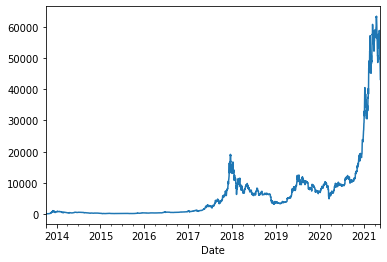

In [ ]:
df['Closing Price (USD)'].plot()

In [ ]:
bitcoin = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


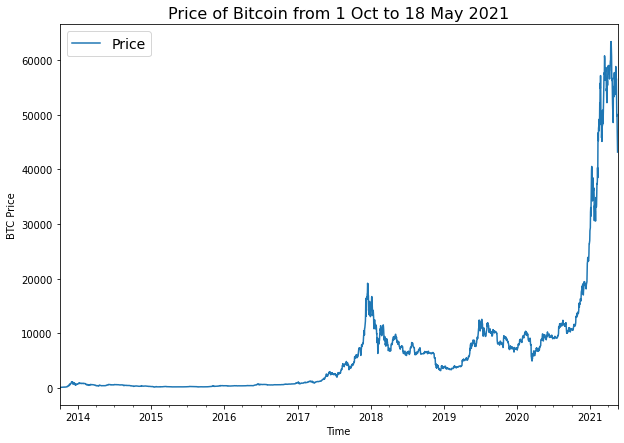

In [ ]:
bitcoin.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.xlabel("Time")
plt.title("Price of Bitcoin from 1 Oct to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
# Q2: Answer
bitcoin[['Price']].idxmax()

Price   2021-04-16
dtype: datetime64[ns]

In [ ]:
bitcoin[['Price']].idxmin()

Price   2013-10-03
dtype: datetime64[ns]

In [ ]:
bitcoin.describe()

,Price
count,2787.000000
mean,6529.845141
std,10887.847444
min,108.584830
25%,460.087500
50%,2780.182500
75%,8506.923720
max,63346.789035


##Using Python CSV module for loading CSV files and plotting time series graph

In [5]:
time = []
price = []

with open('data_BTC.csv', "r", newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=",")
  next(spamreader, None)
  for row in spamreader:
    time.append(datetime.strptime(row[1], "%Y-%m-%d"))
    price.append(float(row[2]))

# price = price[:]
# time = time[:]

print(price)
print(time)

[123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795, 123.033, 124.049, 125.96116, 125.27966, 125.9275, 126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355, 175.03166, 177.6965, 187.15983, 192.75666, 197.4, 196.02499, 198.04883, 198.93233, 200.543, 210.3075, 225.02, 248.25333, 262.32666, 294.48699, 331.10325, 285.8875, 304.97974, 338.137, 357.48, 402.954, 409.10375, 420.21649, 437.29725, 510.6025, 693.65, 531.54249, 574.71599, 681.33, 774.18, 746.19374, 768.8475, 789.36475, 893.1815, 934.355, 1068.363, 1154.92593, 1099.51926, 1019.78966, 1028.845, 1071.2848, 1139.33083, 1004.61633, 759.43041, 689.81, 841.83966, 916.77599, 967.42866, 866.29003, 911.23204, 889.81946, 848.9975, 868.95316, 653.80483, 654.06266, 553.69166, 693.05883, 649.38965, 595.95883, 647.68316, 671.58116, 659.84333, 702.00083, 758.01016, 734.01166, 717.92623, 752.82022, 744.17249, 768.40783, 769.09849, 804.02719,

#### Plotting function

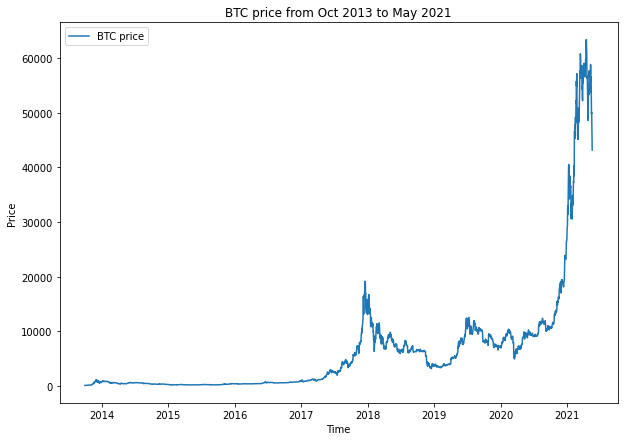

In [6]:
def plot_data(time, value):
  plt.figure(figsize=(10, 7))
  plt.plot(time, value, label="BTC price")
  plt.xlabel("Time")
  plt.ylabel("Price")
  plt.title("BTC price from Oct 2013 to May 2021")
  plt.legend()
  plt.show()


plot_data(time, price)

### Trai/Test Split (Wrong Way)

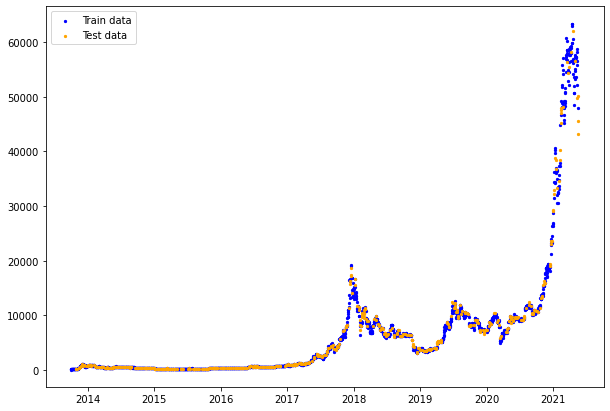

In [7]:
X_train, X_test, y_train, y_test = train_test_split(time, price, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, color='blue', label="Train data")
plt.scatter(X_test, y_test, s=5, color='orange', label="Test data")
plt.legend()
plt.show() 

#### The randomness in data create problem in timeseries as we can see in above graph that randomness will eliminate the flow or conitinue of the data. It is not simulating the real situation. In timeseries we are trying to predict the future that's why due to random split our data can see the future values hence this issue in time series is called Data leakage.

### Train/Test Split (Right Way)

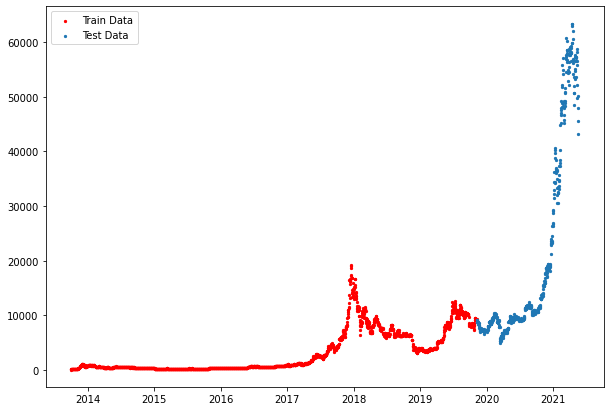

In [8]:
X_train, X_test, y_train, y_test = train_test_split(time, price, test_size=0.2, shuffle=False)
y_test = tf.constant(y_test)
y_test = tf.constant(y_test)
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, color="red", label="Train Data")
plt.scatter(X_test, y_test, s=5, label="Test Data")
plt.legend()
plt.show();

In [9]:
#Creating a plotting function

def plot_timeSeries(X_train, y_train, X_test, y_test):
  plt.figure(figsize=(10, 7))
  plt.scatter(X_train, y_train, s=5, label="Train Data")
  plt.scatter(X_test, y_test, s=5, color="red", label="Test Data")
  plt.title()
  plt.legend()
  plt.show();

def timeSeries_plot(timeSteps, prices, format=".", start=0, end=None, label=None):
  plt.plot(timeSteps[start:end], prices[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

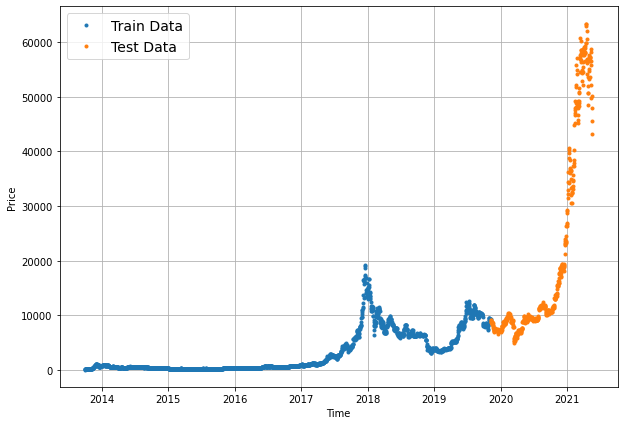

In [10]:
plt.figure(figsize=(10, 7))
timeSeries_plot(X_train, y_train, label="Train Data")
timeSeries_plot(X_test, y_test, label="Test Data")

## Modelling Experiments

####List of Experiments:

Experiment, horizon, window

* Naive Model (Baseline)
* Dense Model, 1, 7
* Same as Model_1, 1, 30
* Same as Model_2, 7, 30
* Conv1D
* LSTM
* Same as Model 1 (but with multivariate Data)
* N-BEATs algorithm
* Ensemble (multiple models stacked together)
* Future Prediction model
* Same as model 1 (but with turkey data introduced)

##Naive Forecast - Experiment#0

#### The formula for Naive Forecast is:

$$\hat{y}_{t} = y_{t-1}$$

Defination:
> The prediction at previous timestep t (y_hat) is equal to the the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [ ]:
y_test[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9226.485 , 8794.358 , 8798.042 , 9081.187 , 8711.534 , 8760.893 ,
       8749.5205, 8656.971 , 8500.644 , 8469.261 ], dtype=float32)>

In [ ]:
naive_forecast = y_test[:-1]

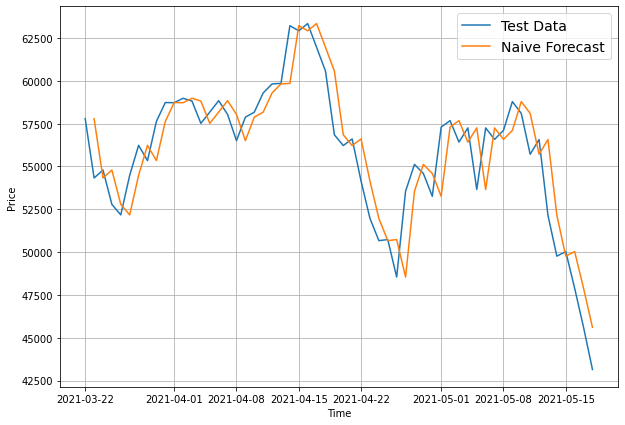

In [ ]:
plt.figure(figsize=(10, 7))
# timeSeries_plot(timeSteps=X_train, prices=y_train, format=".", start=0, end=None, label="Train Data")
timeSeries_plot(timeSteps=X_test, prices=y_test, format="-", start=500, end=None, label="Test Data")
timeSeries_plot(timeSteps=X_test[1:], prices=naive_forecast, format='-', start=500, label="Naive Forecast")

> Why naive forecast is hard to beat, does the term autorgressive come up?

#### Evaluating the forecasting Model

We need regression matrix

* Root Mean Square Error (RMSE) *-Can be used with any regression problem*
* Mean Absolute Error (MAE) *-Can be used when larger error are more significant than small errors*
* Mean Squared Error (MSE) *-Can be used when larger error are more significant than small errors but it is more interpretable*
* R-squared
* Huber Loss *-Combo of MAE and MSE. Less sensitive to outliers than MSE*
* Mean Absolute percentage error (MAPE/sMAPE) *-It is recommended not to use by Hyndman & Koehler but you need to use your intution that which one is performing best. Mostly use in M-competitions*
* Mean Absolute scaled error (MASE) *-A scaled error > 1 if the forecast is worse than the naive and <1 if the forecast is better than naive*


**How our model;s forecast (y_pred) compared against the actual values (y_true or ground truth values)?**



In [11]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # Our seasonality is of 1 day
  return mae / mae_naive_no_season

In [12]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

NameError: ignored

In [13]:
def time_series_evaluation_metrics(y_true, y_pred):
  try:
    if y_pred.shape[1] > 1:
      mae = tf.reduce_mean(tf.keras.metrics.mean_absolute_error(y_true, y_pred))
      mse = tf.reduce_mean(tf.keras.metrics.mean_squared_error(y_true, y_pred))
      rmse = tf.reduce_mean(tf.sqrt(mse))
      mape = tf.reduce_mean(tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred))
      mase = tf.reduce_mean(mean_absolute_scaled_error(y_true, y_pred))
  except:
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

  return {'MAE': mae.numpy(),
          'MSE': mse.numpy(),
          'RMSE': rmse.numpy(),
          'MAPE': mape.numpy(),
          'MASE': mase.numpy()}

In [ ]:
naive_result = time_series_evaluation_metrics(y_test[1:], naive_forecast)
naive_result

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'MAPE': 2.516525,
 'MASE': 0.99957}

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=20056.635>

In [ ]:
tf.reduce_max(y_test), tf.reduce_min(y_test)

(<tf.Tensor: shape=(), dtype=float32, numpy=63346.79>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4944.702>)

In [ ]:
print(f"{time_series_evaluation_metrics(y_test[1:], naive_forecast)['MAE'] / tf.reduce_max(y_test).numpy() * 100} %")

0.8966203778982162 %


In [ ]:
print(f"{time_series_evaluation_metrics(y_test[1:], naive_forecast)['MAE'] / tf.reduce_min(y_test).numpy() * 100} %")

11.486642062664032 %


In [ ]:
print(f"{time_series_evaluation_metrics(y_test[1:], naive_forecast)['MAE'] / tf.reduce_mean(y_test).numpy() * 100} %")

2.8318820521235466 %


#### We want to convert our data into windows

In [14]:
HORIZON = 1
WINDOW = 7
def get_labelled_windows(data, horizon=HORIZON, window=WINDOW):
  """
  Create labels for windowed dataset.

  E.g.
  Input: [1, 2, 3, 4, 5, 6, 7, 8] -> Output: ([1, 2, 3, 4, 5, 6, 7], [8])
  """

  return data[:, :-horizon], data[:, -horizon:]

In [15]:
array = np.array(price)
window_array = np.array([[]])
for i in range(0, len(array), 1):
  temp_list = price[i:i+8]
  # print(temp_list[:7], temp_list[-1])

In [16]:
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

full_windows, full_labels = make_windows(array)

for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


## Turning windows into training and test sets

In [17]:
def make_train_test_split(windows, labels, split=0.2):
  split_size = int(len(windows) * (1-split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [18]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
#checking if y_train anf train_label dataset are equal
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW:])

False

### Creating a Modelling checkpoint

> Our model performance will fluctuate from experiment to experiment, we are goinf to write a model checkpoint so we can compare apples to apples. We want to compare each of our models best performances against the other models best performance.

In [19]:
import os
from tensorflow.keras import layers

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

## Model 1: Dense model (window = 7, horizon = 1)

We will be making a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam Optimization and MAE loss function
* batch size of 128
* 100 epochs

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="Model")

model_1.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae", "mse"])

history_1 = model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 1:13 - loss: 1947.2371 - mae: 1947.2371 - mse: 7906725.0000

18/18 [==============================] - 5s 48ms/step - loss: 701.2875 - mae: 701.2875 - mse: 1900358.2500 - val_loss: 1730.3116 - val_mae: 1730.3116 - val_mse: 8557050.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 290.1734 - mae: 290.1734 - mse: 482169.6250

18/18 [==============================] - 1s 32ms/step - loss: 245.1275 - mae: 245.1275 - mse: 279017.1875 - val_loss: 1265.5787 - val_mae: 1265.5787 - val_mse: 5107253.0000
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 206.8192 - mae: 206.8192 - mse: 211231.8750

18/18 [==============================] - 1s 30ms/step - loss: 205.3471 - mae: 205.3471 - mse: 210370.2031 - val_loss: 1089.2021 - val_mae: 1089.2021 - val_mse: 3895870.5000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 254.0782 - mae: 254.0782 - mse: 331644.2812

18/18 [==============================] - 1s 40ms/step - loss: 193.1208 - mae: 193.1208 - mse: 195991.9531 - val_loss: 1066.7858 - val_mae: 1066.7858 - val_mse: 3679365.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 186.6651 - mae: 186.6651 - mse: 131307.4688

18/18 [==============================] - 1s 30ms/step - loss: 189.1004 - mae: 189.1004 - mse: 189280.7812 - val_loss: 1009.6558 - val_mae: 1009.6558 - val_mse: 3258425.5000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 132.7542 - mae: 132.7542 - mse: 66816.8594

18/18 [==============================] - 1s 32ms/step - loss: 177.8286 - mae: 177.8286 - mse: 165971.7188 - val_loss: 952.7808 - val_mae: 952.7808 - val_mse: 3027726.2500
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 209.0020 - mae: 209.0020 - mse: 316816.4062

18/18 [==============================] - 1s 29ms/step - loss: 167.2184 - mae: 167.2184 - mse: 150308.3906 - val_loss: 919.5226 - val_mae: 919.5226 - val_mse: 2767861.7500
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 134.3409 - mae: 134.3409 - mse: 75609.7734

18/18 [==============================] - 1s 31ms/step - loss: 159.6451 - mae: 159.6451 - mse: 140082.8438 - val_loss: 879.4562 - val_mae: 879.4562 - val_mse: 2601321.0000
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 132.0873 - mae: 132.0873 - mse: 80396.2266

18/18 [==============================] - 1s 32ms/step - loss: 157.7177 - mae: 157.7177 - mse: 134089.1094 - val_loss: 841.7172 - val_mae: 841.7172 - val_mse: 2370078.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 157.8709 - mae: 157.8709 - mse: 178323.0625

18/18 [==============================] - 1s 31ms/step - loss: 152.7318 - mae: 152.7318 - mse: 128420.8672 - val_loss: 815.8618 - val_mae: 815.8619 - val_mse: 2205765.0000
Epoch 11/100
18/18 [==============================] - 0s 8ms/step - loss: 144.9265 - mae: 144.9265 - mse: 116305.8750 - val_loss: 835.3004 - val_mae: 835.3004 - val_mse: 2169525.0000
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 141.9634 - mae: 141.9634 - mse: 112068.8203 - val_loss: 863.2430 - val_mae: 863.2430 - val_mse: 2198125.0000
Epoch 13/100
16/18 [=========================>....] - ETA: 0s - loss: 142.1346 - mae: 142.1346 - mse: 112118.4141

18/18 [==============================] - 1s 42ms/step - loss: 142.8133 - mae: 142.8133 - mse: 110980.6172 - val_loss: 812.5082 - val_mae: 812.5082 - val_mse: 2021020.5000
Epoch 14/100
12/18 [===================>..........] - ETA: 0s - loss: 132.4643 - mae: 132.4643 - mse: 98868.4141

18/18 [==============================] - 1s 44ms/step - loss: 135.6697 - mae: 135.6697 - mse: 103477.4609 - val_loss: 757.6290 - val_mae: 757.6290 - val_mse: 1842721.6250
Epoch 15/100
14/18 [======================>.......] - ETA: 0s - loss: 138.5019 - mae: 138.5019 - mse: 107224.7344

18/18 [==============================] - 1s 44ms/step - loss: 136.9298 - mae: 136.9298 - mse: 101481.0938 - val_loss: 741.4065 - val_mae: 741.4065 - val_mse: 1768779.7500
Epoch 16/100
13/18 [====================>.........] - ETA: 0s - loss: 132.8389 - mae: 132.8389 - mse: 92842.8594

18/18 [==============================] - 1s 48ms/step - loss: 130.9481 - mae: 130.9481 - mse: 95159.2812 - val_loss: 730.2867 - val_mae: 730.2867 - val_mse: 1713737.6250
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 117.2351 - mae: 117.2351 - mse: 63812.6445

18/18 [==============================] - 1s 31ms/step - loss: 129.4083 - mae: 129.4083 - mse: 95972.1172 - val_loss: 716.0139 - val_mae: 716.0139 - val_mse: 1656591.5000
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 138.3566 - mae: 138.3566 - mse: 100570.0078

18/18 [==============================] - 0s 28ms/step - loss: 126.9744 - mae: 126.9744 - mse: 91855.6797 - val_loss: 686.2650 - val_mae: 686.2650 - val_mse: 1587285.3750
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 126.4793 - mae: 126.4793 - mse: 91186.2891 - val_loss: 709.3403 - val_mae: 709.3403 - val_mse: 1608118.5000
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 135.1887 - mae: 135.1887 - mse: 98466.5625

18/18 [==============================] - 1s 30ms/step - loss: 123.9638 - mae: 123.9638 - mse: 89035.4844 - val_loss: 674.1827 - val_mae: 674.1827 - val_mse: 1569546.0000
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 149.6394 - mae: 149.6394 - mse: 101294.5391

18/18 [==============================] - 0s 28ms/step - loss: 127.4503 - mae: 127.4503 - mse: 92522.3359 - val_loss: 661.7550 - val_mae: 661.7550 - val_mse: 1482036.5000
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 121.6364 - mae: 121.6364 - mse: 86149.8984 - val_loss: 677.4697 - val_mae: 677.4697 - val_mse: 1495853.2500
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 117.9531 - mae: 117.9531 - mse: 61223.1250

18/18 [==============================] - 1s 30ms/step - loss: 123.9583 - mae: 123.9583 - mse: 86493.0469 - val_loss: 658.2568 - val_mae: 658.2568 - val_mse: 1444725.3750
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 130.3343 - mae: 130.3343 - mse: 85664.5000

18/18 [==============================] - 1s 41ms/step - loss: 121.5459 - mae: 121.5459 - mse: 84955.1094 - val_loss: 641.8447 - val_mae: 641.8447 - val_mse: 1428884.8750
Epoch 25/100
15/18 [========================>.....] - ETA: 0s - loss: 123.9670 - mae: 123.9670 - mse: 88274.2344

18/18 [==============================] - 1s 30ms/step - loss: 119.1799 - mae: 119.1799 - mse: 81930.5938 - val_loss: 640.1522 - val_mae: 640.1522 - val_mse: 1429346.2500
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 120.3627 - mae: 120.3627 - mse: 70335.0000

18/18 [==============================] - 1s 30ms/step - loss: 118.9452 - mae: 118.9452 - mse: 81877.1016 - val_loss: 629.9870 - val_mae: 629.9870 - val_mse: 1376245.2500
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 161.3372 - mae: 161.3372 - mse: 123549.8516

18/18 [==============================] - 1s 30ms/step - loss: 120.4686 - mae: 120.4686 - mse: 81961.7734 - val_loss: 629.0241 - val_mae: 629.0241 - val_mse: 1384567.3750
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 111.9052 - mae: 111.9052 - mse: 66985.5312

18/18 [==============================] - 1s 33ms/step - loss: 116.2181 - mae: 116.2181 - mse: 79574.6484 - val_loss: 622.2385 - val_mae: 622.2385 - val_mse: 1341714.2500
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 112.7764 - mae: 112.7764 - mse: 81762.9219

18/18 [==============================] - 1s 30ms/step - loss: 115.9013 - mae: 115.9013 - mse: 78687.6406 - val_loss: 615.4991 - val_mae: 615.4991 - val_mse: 1328041.1250
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 121.0440 - mae: 121.0440 - mse: 82357.2578 - val_loss: 618.3519 - val_mae: 618.3519 - val_mse: 1319202.2500
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 121.7531 - mae: 121.7531 - mse: 79760.4297 - val_loss: 678.3406 - val_mae: 678.3406 - val_mse: 1458848.2500
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 123.0504 - mae: 123.0504 - mse: 83263.6719

18/18 [==============================] - 1s 31ms/step - loss: 117.8202 - mae: 117.8202 - mse: 81640.4531 - val_loss: 607.8397 - val_mae: 607.8397 - val_mse: 1293384.7500
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0636 - mae: 115.0636 - mse: 77674.8203 - val_loss: 684.8676 - val_mae: 684.8676 - val_mse: 1469504.7500
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9645 - mae: 115.9645 - mse: 79221.5000 - val_loss: 624.0695 - val_mae: 624.0695 - val_mse: 1345254.8750
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 108.7286 - mae: 108.7286 - mse: 62022.4375

18/18 [==============================] - 1s 30ms/step - loss: 113.7925 - mae: 113.7925 - mse: 76201.0391 - val_loss: 597.2112 - val_mae: 597.2112 - val_mse: 1267044.2500
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 154.2083 - mae: 154.2083 - mse: 148066.6562

18/18 [==============================] - 1s 30ms/step - loss: 117.3194 - mae: 117.3194 - mse: 77823.0312 - val_loss: 595.7894 - val_mae: 595.7894 - val_mse: 1259441.0000
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1348 - mae: 113.1348 - mse: 76846.9141 - val_loss: 603.4070 - val_mae: 603.4070 - val_mse: 1265828.3750
Epoch 38/100
18/18 [==============================] - 0s 4ms/step - loss: 112.9615 - mae: 112.9615 - mse: 75303.5078 - val_loss: 607.2388 - val_mae: 607.2388 - val_mse: 1291598.7500
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 126.8699 - mae: 126.8699 - mse: 95560.6953

18/18 [==============================] - 1s 29ms/step - loss: 116.4431 - mae: 116.4431 - mse: 75789.2734 - val_loss: 589.6002 - val_mae: 589.6002 - val_mse: 1241603.5000
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 103.4905 - mae: 103.4905 - mse: 83478.2656

18/18 [==============================] - 1s 30ms/step - loss: 110.9927 - mae: 110.9927 - mse: 73548.9141 - val_loss: 588.4728 - val_mae: 588.4728 - val_mse: 1238468.8750
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2604 - mae: 114.2604 - mse: 74473.7656 - val_loss: 652.6150 - val_mae: 652.6150 - val_mse: 1401334.1250
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 116.7967 - mae: 116.7967 - mse: 77912.0312 - val_loss: 646.2960 - val_mae: 646.2960 - val_mse: 1349921.1250
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 117.4206 - mae: 117.4206 - mse: 75283.0703 - val_loss: 677.8751 - val_mae: 677.8751 - val_mse: 1465141.8750
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 124.7912 - mae: 124.7912 - mse: 83821.3047 - val_loss: 671.1119 - val_mae: 671.1119 - val_mse: 1443849.3750
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6064 - mae: 113.6064 - m

18/18 [==============================] - 1s 40ms/step - loss: 113.5720 - mae: 113.5720 - mse: 73496.2266 - val_loss: 579.7053 - val_mae: 579.7053 - val_mse: 1202778.0000
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0451 - mae: 112.0451 - mse: 73300.1016 - val_loss: 641.2847 - val_mae: 641.2847 - val_mse: 1352789.8750
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 110.9188 - mae: 110.9188 - mse: 73009.3906 - val_loss: 583.2016 - val_mae: 583.2016 - val_mse: 1205698.0000
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 110.9297 - mae: 110.9297 - mse: 73929.2656 - val_loss: 603.1245 - val_mae: 603.1245 - val_mse: 1259676.1250
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 112.7819 - mae: 112.7819 - mse: 74073.3906 - val_loss: 612.8318 - val_mae: 612.8318 - val_mse: 1261348.3750
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 114.7985 - mae: 114.7985 - m

18/18 [==============================] - 1s 61ms/step - loss: 112.7314 - mae: 112.7314 - mse: 74864.7891 - val_loss: 575.4691 - val_mae: 575.4691 - val_mse: 1196166.7500
Epoch 56/100
18/18 [==============================] - 0s 12ms/step - loss: 107.3076 - mae: 107.3076 - mse: 70732.3672 - val_loss: 735.9949 - val_mae: 735.9949 - val_mse: 1616897.2500
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 114.4332 - mae: 114.4332 - mse: 75678.3203 - val_loss: 578.3888 - val_mae: 578.3888 - val_mse: 1202893.3750
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 109.4629 - mae: 109.4629 - mse: 70650.3750 - val_loss: 584.5370 - val_mae: 584.5370 - val_mse: 1202332.7500
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 108.3646 - mae: 108.3646 - mse: 71246.2266 - val_loss: 636.5669 - val_mae: 636.5669 - val_mse: 1330296.3750
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 114.0164 - mae: 114.0164 - 

18/18 [==============================] - 1s 48ms/step - loss: 111.5985 - mae: 111.5985 - mse: 74082.4688 - val_loss: 571.1011 - val_mae: 571.1011 - val_mse: 1178400.0000
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6446 - mae: 107.6446 - mse: 69967.3359 - val_loss: 582.0836 - val_mae: 582.0836 - val_mse: 1207910.3750
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 111.9480 - mae: 111.9480 - mse: 72846.8438 - val_loss: 604.2595 - val_mae: 604.2595 - val_mse: 1237610.6250
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 110.9175 - mae: 110.9175 - mse: 72164.9688 - val_loss: 575.1098 - val_mae: 575.1098 - val_mse: 1181188.3750
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 109.1027 - mae: 109.1027 - mse: 71377.8906 - val_loss: 576.7579 - val_mae: 576.7579 - val_mse: 1194201.5000
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 107.5168 - mae: 107.5168 - m

18/18 [==============================] - 1s 32ms/step - loss: 107.1656 - mae: 107.1656 - mse: 68650.5703 - val_loss: 570.8021 - val_mae: 570.8021 - val_mse: 1172549.1250
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8747 - mae: 109.8747 - mse: 69948.3438 - val_loss: 641.0796 - val_mae: 641.0796 - val_mse: 1316580.7500
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 117.0240 - mae: 117.0240 - mse: 73672.5625 - val_loss: 575.0778 - val_mae: 575.0778 - val_mse: 1190449.6250
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 86.7467 - mae: 86.7467 - mse: 47529.4805

18/18 [==============================] - 1s 29ms/step - loss: 109.3832 - mae: 109.3832 - mse: 69557.5000 - val_loss: 568.5406 - val_mae: 568.5406 - val_mse: 1172705.1250
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 93.4521 - mae: 93.4521 - mse: 76963.4453

18/18 [==============================] - 1s 31ms/step - loss: 109.0103 - mae: 109.0103 - mse: 70640.1719 - val_loss: 568.2383 - val_mae: 568.2383 - val_mse: 1172159.2500
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2976 - mae: 116.2976 - mse: 74779.7031 - val_loss: 673.0518 - val_mae: 673.0518 - val_mse: 1418170.0000
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 175.5458 - mae: 175.5458 - mse: 180989.1719

18/18 [==============================] - 1s 31ms/step - loss: 107.6819 - mae: 107.6819 - mse: 70446.4453 - val_loss: 567.4501 - val_mae: 567.4501 - val_mse: 1167996.0000
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6451 - mae: 107.6451 - mse: 69165.3906 - val_loss: 569.0658 - val_mae: 569.0658 - val_mse: 1167714.0000
Epoch 76/100
14/18 [======================>.......] - ETA: 0s - loss: 110.1302 - mae: 110.1302 - mse: 70834.7344

18/18 [==============================] - 1s 31ms/step - loss: 108.4982 - mae: 108.4982 - mse: 70402.4609 - val_loss: 565.2366 - val_mae: 565.2366 - val_mse: 1161387.8750
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 105.5738 - mae: 105.5738 - mse: 68001.1641 - val_loss: 566.6879 - val_mae: 566.6879 - val_mse: 1163140.2500
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 107.6012 - mae: 107.6012 - mse: 68206.7812 - val_loss: 584.0834 - val_mae: 584.0834 - val_mse: 1206501.3750
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4887 - mae: 107.4887 - mse: 69673.7344 - val_loss: 579.5483 - val_mae: 579.5483 - val_mse: 1196500.0000
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 108.2677 - mae: 108.2677 - mse: 71041.5781 - val_loss: 604.4296 - val_mae: 604.4296 - val_mse: 1230522.0000
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 106.5849 - mae: 106.5849 - m

18/18 [==============================] - 0s 28ms/step - loss: 110.5801 - mae: 110.5801 - mse: 71438.1406 - val_loss: 564.5006 - val_mae: 564.5006 - val_mse: 1157544.7500
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9678 - mae: 109.9678 - mse: 71640.5312 - val_loss: 626.6640 - val_mae: 626.6640 - val_mse: 1294855.3750
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 121.2972 - mae: 121.2972 - mse: 76894.8359 - val_loss: 655.1025 - val_mae: 655.1025 - val_mse: 1363708.6250
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6164 - mae: 112.6164 - mse: 73062.2109 - val_loss: 592.2703 - val_mae: 592.2703 - val_mse: 1201479.2500
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 105.8028 - mae: 105.8028 - mse: 67173.5938 - val_loss: 568.7495 - val_mae: 568.7495 - val_mse: 1167842.5000
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0999 - mae: 106.0999 - m

18/18 [==============================] - 1s 30ms/step - loss: 105.2280 - mae: 105.2280 - mse: 67900.2188 - val_loss: 564.3530 - val_mae: 564.3530 - val_mse: 1156073.8750
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0790 - mae: 106.0790 - mse: 68695.6719 - val_loss: 568.6233 - val_mae: 568.6233 - val_mse: 1167306.5000
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 106.4119 - mae: 106.4119 - mse: 69019.2500 - val_loss: 565.4166 - val_mae: 565.4166 - val_mse: 1154528.7500
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6945 - mae: 108.6945 - mse: 68364.5234 - val_loss: 571.6979 - val_mae: 571.6979 - val_mse: 1164845.3750


In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 571.6979 - mae: 571.6979 - mse: 1164845.0000


[571.6979370117188, 571.6979370117188, 1164845.0]

In [ ]:
model_1 = tf.keras.models.load_model("model_experiments/Model")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 564.3530 - mae: 564.3530 - mse: 1156073.6250


[564.3529663085938, 564.3529663085938, 1156073.625]

### Making forecast with Model_1

In [20]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 4ms/step


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8849.377, 8777.058, 9033.012, 8781.165, 8744.621, 8745.047,
        8682.333, 8507.527, 8467.528, 8524.449], dtype=float32)>)

In [ ]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [ ]:
test_labels.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [ ]:
model_1_results = time_series_evaluation_metrics(y_true=tf.squeeze(tf.cast(test_labels, tf.float32)), y_pred=model_1_preds)
model_1_results

{'MAE': 564.35297,
 'MSE': 1156073.5,
 'RMSE': 1075.2086,
 'MAPE': 2.51578,
 'MASE': 0.99141186}

In [ ]:
naive_result

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'MAPE': 2.516525,
 'MASE': 0.99957}

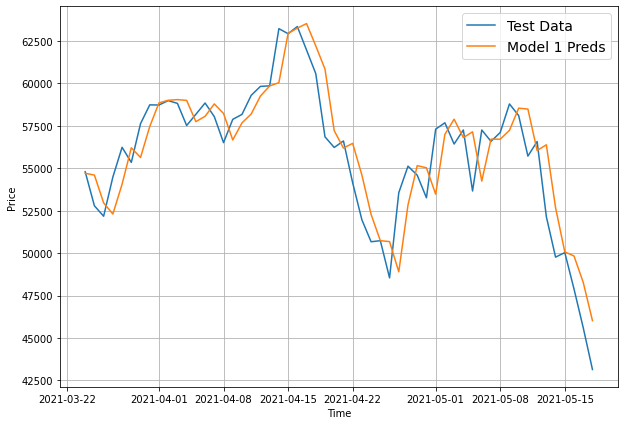

In [ ]:
offset = 500
plt.figure(figsize=(10, 7))

timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=test_labels[:, ], format="-", start=offset, end=None, label="Test Data")
timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=model_1_preds, format="-", start=offset, end=None, label="Model 1 Preds")

> As we have surpassed our baseline. Now its time to improve our model and for improving our model we will be doing more experiments

In [ ]:
HORIZON = 1
WINDOW = 30
full_windows, full_labels = make_windows(array, WINDOW, HORIZON)

for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
 133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
 177.63333 188.29716 200.70166 180.355   175.03166 177.6965  187.15983
 192.75666 197.4    ] -> Label: [196.02499]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033
 124.049   125.96116 125.27966 125.9275  126.38333 135.24199 133.20333
 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333
 188.29716 200.70166 180.355   175.03166 177.6965  187.15983 192.75666
 197.4     196.02499] -> Label: [198.04883]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049
 125.96116 125.27966 125.9275  126.38333 135.24199 133.20333 142.76333
 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333 188.29716
 200.70166 180.355   175.03166 177.6965  187.15983 192.75666 197.4
 196.02499 198.04883] -> Label: [198.93233]


In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON]).shape, len(y_train[WINDOW-5:]))

False

In [ ]:
np.squeeze(train_labels[:-HORIZON]).shape, len(y_train[WINDOW-5:])

((2204,), 2204)

## Model 2

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="Model_2")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

history_2 = model_2.fit(train_windows,
                        train_labels,
                        epochs=100,
                        batch_size=128,
                        verbose=1,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 14s - loss: 5684.3687 - mae: 5684.3687 - mse: 79601408.0000

18/18 [==============================] - 1s 38ms/step - loss: 2469.8987 - mae: 2469.8987 - mse: 23150894.0000 - val_loss: 5137.9653 - val_mae: 5137.9653 - val_mse: 58319116.0000
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 622.8486 - mae: 622.8486 - mse: 1603375.5000  

18/18 [==============================] - 1s 31ms/step - loss: 618.7522 - mae: 618.7522 - mse: 1588298.2500 - val_loss: 2133.7427 - val_mae: 2133.7427 - val_mse: 12097203.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 498.8956 - mae: 498.8956 - mse: 1252309.7500

18/18 [==============================] - 1s 30ms/step - loss: 431.4370 - mae: 431.4370 - mse: 806201.1250 - val_loss: 1838.5625 - val_mae: 1838.5625 - val_mse: 9438798.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 299.9407 - mae: 299.9407 - mse: 480681.8750

18/18 [==============================] - 1s 45ms/step - loss: 361.3969 - mae: 361.3969 - mse: 577163.0000 - val_loss: 1573.1918 - val_mae: 1573.1918 - val_mse: 7548631.0000
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 311.8466 - mae: 311.8466 - mse: 439730.7500 - val_loss: 1634.7371 - val_mae: 1634.7371 - val_mse: 7800492.5000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 358.4803 - mae: 358.4803 - mse: 825646.1250

18/18 [==============================] - 1s 30ms/step - loss: 273.0605 - mae: 273.0605 - mse: 362689.8438 - val_loss: 1505.4288 - val_mae: 1505.4288 - val_mse: 6560745.5000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 254.6908 - mae: 254.6908 - mse: 334553.5000

18/18 [==============================] - 1s 32ms/step - loss: 248.6304 - mae: 248.6304 - mse: 300954.3438 - val_loss: 1279.3904 - val_mae: 1279.3904 - val_mse: 5222654.0000
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 235.6806 - mae: 235.6806 - mse: 271738.2500 - val_loss: 1532.3132 - val_mae: 1532.3132 - val_mse: 6175880.5000
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 259.6008 - mae: 259.6008 - mse: 358954.9062

18/18 [==============================] - 1s 30ms/step - loss: 229.2225 - mae: 229.2225 - mse: 252755.9375 - val_loss: 1260.2555 - val_mae: 1260.2555 - val_mse: 4711512.5000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 286.0641 - mae: 286.0641 - mse: 347537.5625

18/18 [==============================] - 1s 30ms/step - loss: 219.8701 - mae: 219.8701 - mse: 238387.3438 - val_loss: 1150.7690 - val_mae: 1150.7690 - val_mse: 4344970.0000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 191.1895 - mae: 191.1895 - mse: 169693.3281

18/18 [==============================] - 1s 30ms/step - loss: 208.3992 - mae: 208.3992 - mse: 219650.3750 - val_loss: 1112.5632 - val_mae: 1112.5632 - val_mse: 3999654.0000
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 199.0221 - mae: 199.0221 - mse: 204381.9219 - val_loss: 1117.3269 - val_mae: 1117.3269 - val_mse: 3815517.2500
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 192.4685 - mae: 192.4685 - mse: 191724.6250 - val_loss: 1121.3948 - val_mae: 1121.3948 - val_mse: 4131266.7500
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 189.0675 - mae: 189.0675 - mse: 177161.6719

18/18 [==============================] - 1s 30ms/step - loss: 189.9406 - mae: 189.9406 - mse: 187391.0156 - val_loss: 1040.7076 - val_mae: 1040.7076 - val_mse: 3584439.5000
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 189.8334 - mae: 189.8334 - mse: 180038.2344 - val_loss: 1083.3906 - val_mae: 1083.3906 - val_mse: 3840037.5000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 191.2722 - mae: 191.2722 - mse: 177455.7812

18/18 [==============================] - 1s 29ms/step - loss: 188.1812 - mae: 188.1812 - mse: 180605.3750 - val_loss: 1006.4555 - val_mae: 1006.4555 - val_mse: 3115248.2500
Epoch 17/100
18/18 [==============================] - 0s 9ms/step - loss: 172.8140 - mae: 172.8140 - mse: 159161.6094 - val_loss: 1155.7144 - val_mae: 1155.7144 - val_mse: 3586798.7500
Epoch 18/100
15/18 [========================>.....] - ETA: 0s - loss: 177.0773 - mae: 177.0773 - mse: 163318.9531

18/18 [==============================] - 1s 43ms/step - loss: 178.1278 - mae: 178.1278 - mse: 164727.0156 - val_loss: 949.7411 - val_mae: 949.7411 - val_mse: 2921804.0000
Epoch 19/100
14/18 [======================>.......] - ETA: 0s - loss: 168.5150 - mae: 168.5150 - mse: 142075.0625

18/18 [==============================] - 1s 42ms/step - loss: 169.1183 - mae: 169.1183 - mse: 151160.0000 - val_loss: 947.8007 - val_mae: 947.8007 - val_mse: 2932795.5000
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 164.4512 - mae: 164.4512 - mse: 128540.2656

18/18 [==============================] - 1s 43ms/step - loss: 165.8254 - mae: 165.8254 - mse: 145138.5938 - val_loss: 914.8066 - val_mae: 914.8066 - val_mse: 2669984.2500
Epoch 21/100
14/18 [======================>.......] - ETA: 0s - loss: 171.3156 - mae: 171.3156 - mse: 160741.2969

18/18 [==============================] - 1s 42ms/step - loss: 170.5728 - mae: 170.5728 - mse: 152827.1250 - val_loss: 912.5875 - val_mae: 912.5875 - val_mse: 2558789.7500
Epoch 22/100
18/18 [==============================] - 0s 7ms/step - loss: 166.6847 - mae: 166.6847 - mse: 138732.7344 - val_loss: 951.8900 - val_mae: 951.8900 - val_mse: 2952813.0000
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 177.2869 - mae: 177.2869 - mse: 149105.9688 - val_loss: 1130.2783 - val_mae: 1130.2783 - val_mse: 3364553.7500
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 166.7752 - mae: 166.7752 - mse: 139725.3281 - val_loss: 1042.8394 - val_mae: 1042.8394 - val_mse: 3408139.0000
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 178.0981 - mae: 178.0981 - mse: 151692.3594 - val_loss: 1128.2454 - val_mae: 1128.2454 - val_mse: 3305250.2500
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 166.8798 - mae: 166.8

18/18 [==============================] - 1s 31ms/step - loss: 154.6689 - mae: 154.6689 - mse: 126449.4141 - val_loss: 861.8726 - val_mae: 861.8726 - val_mse: 2434987.2500
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 111.4252 - mae: 111.4252 - mse: 41120.8516

18/18 [==============================] - 1s 30ms/step - loss: 155.5550 - mae: 155.5550 - mse: 128125.1719 - val_loss: 842.6348 - val_mae: 842.6348 - val_mse: 2288361.2500
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 149.0132 - mae: 149.0132 - mse: 122415.8203 - val_loss: 858.4221 - val_mae: 858.4221 - val_mse: 2443194.5000
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 150.6960 - mae: 150.6960 - mse: 123818.5625 - val_loss: 850.5054 - val_mae: 850.5054 - val_mse: 2185380.0000
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 146.0842 - mae: 146.0842 - mse: 118232.3750 - val_loss: 1058.7437 - val_mae: 1058.7437 - val_mse: 2947987.2500
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 191.9819 - mae: 191.9819 - mse: 114459.2656

18/18 [==============================] - 1s 45ms/step - loss: 152.5742 - mae: 152.5742 - mse: 124611.0781 - val_loss: 814.6096 - val_mae: 814.6096 - val_mse: 2082643.2500
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 171.5889 - mae: 171.5889 - mse: 142977.8125

18/18 [==============================] - 1s 30ms/step - loss: 160.6671 - mae: 160.6671 - mse: 131396.3125 - val_loss: 811.0477 - val_mae: 811.0477 - val_mse: 2174630.0000
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 145.3149 - mae: 145.3149 - mse: 117693.9375 - val_loss: 815.4231 - val_mae: 815.4231 - val_mse: 2227237.2500
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 161.1528 - mae: 161.1528 - mse: 136093.1719 - val_loss: 833.7528 - val_mae: 833.7528 - val_mse: 2047853.0000
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 171.4821 - mae: 171.4821 - mse: 136070.4688 - val_loss: 906.7625 - val_mae: 906.7625 - val_mse: 2613000.2500
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 153.7322 - mae: 153.7322 - mse: 119390.2891 - val_loss: 919.9089 - val_mae: 919.9089 - val_mse: 2338798.7500
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 146.1083 - mae: 146.108

18/18 [==============================] - 1s 31ms/step - loss: 150.8187 - mae: 150.8187 - mse: 119912.7266 - val_loss: 797.1525 - val_mae: 797.1525 - val_mse: 2083189.3750
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 141.8604 - mae: 141.8604 - mse: 105766.2656 - val_loss: 995.6949 - val_mae: 995.6949 - val_mse: 2617711.7500
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 132.5892 - mae: 132.5892 - mse: 52037.4688

18/18 [==============================] - 1s 30ms/step - loss: 152.6202 - mae: 152.6202 - mse: 114630.7656 - val_loss: 761.0976 - val_mae: 761.0976 - val_mse: 1930068.6250
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 138.8461 - mae: 138.8461 - mse: 106387.7812 - val_loss: 806.8416 - val_mae: 806.8416 - val_mse: 1940643.6250
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 122.4620 - mae: 122.4620 - mse: 67734.3125

18/18 [==============================] - 1s 31ms/step - loss: 135.4282 - mae: 135.4282 - mse: 102586.4609 - val_loss: 752.7546 - val_mae: 752.7546 - val_mse: 1869975.7500
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 136.3484 - mae: 136.3484 - mse: 103139.4297 - val_loss: 754.5992 - val_mae: 754.5992 - val_mse: 1817457.0000
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 132.1897 - mae: 132.1897 - mse: 99167.8125 - val_loss: 773.3297 - val_mae: 773.3297 - val_mse: 1838580.7500
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 132.8717 - mae: 132.8717 - mse: 96600.7812 - val_loss: 762.7524 - val_mae: 762.7524 - val_mse: 1804253.2500
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 124.2732 - mae: 124.2732 - mse: 58880.7305

18/18 [==============================] - 1s 33ms/step - loss: 135.9528 - mae: 135.9528 - mse: 104886.2734 - val_loss: 751.5903 - val_mae: 751.5903 - val_mse: 1770119.1250
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 137.5993 - mae: 137.5993 - mse: 100314.0547 - val_loss: 811.8831 - val_mae: 811.8831 - val_mse: 1940366.2500
Epoch 49/100
18/18 [==============================] - ETA: 0s - loss: 132.5677 - mae: 132.5677 - mse: 96750.7188

18/18 [==============================] - 1s 30ms/step - loss: 132.5677 - mae: 132.5677 - mse: 96750.7188 - val_loss: 736.9391 - val_mae: 736.9391 - val_mse: 1735926.5000
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 137.8092 - mae: 137.8092 - mse: 99058.7188 - val_loss: 813.3057 - val_mae: 813.3057 - val_mse: 2096552.6250
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 140.0441 - mae: 140.0441 - mse: 97788.2969 - val_loss: 801.6884 - val_mae: 801.6884 - val_mse: 2043959.6250
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 141.5363 - mae: 141.5363 - mse: 85214.0000

18/18 [==============================] - 1s 31ms/step - loss: 136.2738 - mae: 136.2738 - mse: 98674.9219 - val_loss: 717.3189 - val_mae: 717.3189 - val_mse: 1680120.7500
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 145.6308 - mae: 145.6308 - mse: 104581.6797 - val_loss: 721.8953 - val_mae: 721.8953 - val_mse: 1725731.0000
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 127.9377 - mae: 127.9377 - mse: 64215.9570

18/18 [==============================] - 1s 29ms/step - loss: 132.7057 - mae: 132.7057 - mse: 98090.1328 - val_loss: 712.1379 - val_mae: 712.1379 - val_mse: 1672176.7500
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 134.6944 - mae: 134.6944 - mse: 94146.9531 - val_loss: 773.2051 - val_mae: 773.2051 - val_mse: 1816025.6250
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 146.0771 - mae: 146.0771 - mse: 93891.9219

18/18 [==============================] - 1s 31ms/step - loss: 142.7327 - mae: 142.7327 - mse: 102818.4766 - val_loss: 702.3751 - val_mae: 702.3751 - val_mse: 1638498.5000
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 127.4525 - mae: 127.4525 - mse: 90532.0625 - val_loss: 826.2390 - val_mae: 826.2390 - val_mse: 1984244.0000
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 129.5252 - mae: 129.5252 - mse: 91280.5234 - val_loss: 731.3108 - val_mae: 731.3108 - val_mse: 1777252.0000
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 154.4032 - mae: 154.4032 - mse: 112484.1484 - val_loss: 704.0815 - val_mae: 704.0815 - val_mse: 1599074.3750
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 140.6290 - mae: 140.6290 - mse: 97982.6953 - val_loss: 837.2253 - val_mae: 837.2253 - val_mse: 2016398.1250
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 126.7977 - mae: 126.7977 -

18/18 [==============================] - 1s 32ms/step - loss: 121.9713 - mae: 121.9713 - mse: 85134.0469 - val_loss: 698.0779 - val_mae: 698.0779 - val_mse: 1566200.8750
Epoch 65/100
15/18 [========================>.....] - ETA: 0s - loss: 127.4278 - mae: 127.4278 - mse: 88629.4688 

18/18 [==============================] - 1s 43ms/step - loss: 127.0092 - mae: 127.0092 - mse: 86562.2266 - val_loss: 691.1609 - val_mae: 691.1609 - val_mse: 1550275.8750
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 123.1683 - mae: 123.1683 - mse: 84459.0391 - val_loss: 749.3172 - val_mae: 749.3172 - val_mse: 1708641.5000
Epoch 67/100
18/18 [==============================] - 0s 15ms/step - loss: 132.4369 - mae: 132.4369 - mse: 91318.8750 - val_loss: 918.0370 - val_mae: 918.0370 - val_mse: 2281785.0000
Epoch 68/100
18/18 [==============================] - 0s 13ms/step - loss: 128.6127 - mae: 128.6127 - mse: 87443.8984 - val_loss: 727.5957 - val_mae: 727.5957 - val_mse: 1643461.7500
Epoch 69/100
18/18 [==============================] - 0s 14ms/step - loss: 123.4839 - mae: 123.4839 - mse: 86015.8047 - val_loss: 810.6552 - val_mae: 810.6552 - val_mse: 1905890.5000
Epoch 70/100
18/18 [==============================] - 0s 12ms/step - loss: 126.6625 - mae: 126.6625

18/18 [==============================] - 2s 113ms/step - loss: 133.5222 - mae: 133.5222 - mse: 90917.7812 - val_loss: 688.5852 - val_mae: 688.5852 - val_mse: 1581230.1250
Epoch 78/100
18/18 [==============================] - 0s 15ms/step - loss: 139.3630 - mae: 139.3630 - mse: 100146.8359 - val_loss: 1013.3978 - val_mae: 1013.3978 - val_mse: 2820372.5000
Epoch 79/100
18/18 [==============================] - 0s 14ms/step - loss: 140.2531 - mae: 140.2531 - mse: 95558.0000 - val_loss: 783.3382 - val_mae: 783.3382 - val_mse: 1806719.2500
Epoch 80/100
18/18 [==============================] - 0s 10ms/step - loss: 120.3696 - mae: 120.3696 - mse: 83229.7109 - val_loss: 832.4835 - val_mae: 832.4835 - val_mse: 1971676.2500
Epoch 81/100
18/18 [==============================] - 0s 11ms/step - loss: 128.0721 - mae: 128.0721 - mse: 86716.2656 - val_loss: 705.4772 - val_mae: 705.4772 - val_mse: 1567689.5000
Epoch 82/100
18/18 [==============================] - 0s 15ms/step - loss: 121.8272 - mae: 121

18/18 [==============================] - 1s 65ms/step - loss: 132.2263 - mae: 132.2263 - mse: 86894.8906 - val_loss: 676.6720 - val_mae: 676.6720 - val_mse: 1527234.5000
Epoch 84/100
14/18 [======================>.......] - ETA: 0s - loss: 134.3285 - mae: 134.3285 - mse: 90524.2578

18/18 [==============================] - 1s 67ms/step - loss: 133.7991 - mae: 133.7991 - mse: 91499.6406 - val_loss: 658.8912 - val_mae: 658.8912 - val_mse: 1456348.5000
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 124.7136 - mae: 124.7136 - mse: 86015.2656 - val_loss: 690.4373 - val_mae: 690.4373 - val_mse: 1569986.1250
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 126.9943 - mae: 126.9943 - mse: 86913.0234 - val_loss: 665.2524 - val_mae: 665.2524 - val_mse: 1449986.7500
Epoch 87/100
 1/18 [>.............................] - ETA: 0s - loss: 123.9700 - mae: 123.9700 - mse: 157509.4531

18/18 [==============================] - 1s 74ms/step - loss: 117.6242 - mae: 117.6242 - mse: 78526.1172 - val_loss: 656.2772 - val_mae: 656.2772 - val_mse: 1424551.5000
Epoch 88/100
18/18 [==============================] - 0s 14ms/step - loss: 124.5753 - mae: 124.5753 - mse: 85308.9844 - val_loss: 728.1733 - val_mae: 728.1733 - val_mse: 1629621.6250
Epoch 89/100
18/18 [==============================] - 0s 11ms/step - loss: 123.6080 - mae: 123.6080 - mse: 85405.1953 - val_loss: 964.9331 - val_mae: 964.9331 - val_mse: 2444507.7500
Epoch 90/100
18/18 [==============================] - 0s 12ms/step - loss: 136.4744 - mae: 136.4744 - mse: 97365.2031 - val_loss: 735.2214 - val_mae: 735.2214 - val_mse: 1653992.7500
Epoch 91/100
18/18 [==============================] - 0s 12ms/step - loss: 129.6020 - mae: 129.6020 - mse: 88443.5703 - val_loss: 657.9631 - val_mae: 657.9631 - val_mse: 1429887.5000
Epoch 92/100
18/18 [==============================] - 0s 8ms/step - loss: 118.9386 - mae: 118.9386

18/18 [==============================] - 2s 93ms/step - loss: 118.4494 - mae: 118.4494 - mse: 81252.0938 - val_loss: 643.5580 - val_mae: 643.5580 - val_mse: 1384968.8750
Epoch 97/100
18/18 [==============================] - 0s 13ms/step - loss: 116.3249 - mae: 116.3249 - mse: 78457.7969 - val_loss: 675.2340 - val_mae: 675.2340 - val_mse: 1506489.8750
Epoch 98/100
18/18 [==============================] - 0s 17ms/step - loss: 121.4566 - mae: 121.4566 - mse: 79866.3047 - val_loss: 669.8481 - val_mae: 669.8481 - val_mse: 1472724.3750
Epoch 99/100
18/18 [==============================] - 0s 19ms/step - loss: 116.4578 - mae: 116.4578 - mse: 77962.0859 - val_loss: 711.2824 - val_mae: 711.2824 - val_mse: 1616217.0000
Epoch 100/100
12/18 [===================>..........] - ETA: 0s - loss: 117.4624 - mae: 117.4624 - mse: 76614.3984

18/18 [==============================] - 2s 114ms/step - loss: 117.2535 - mae: 117.2535 - mse: 79304.6641 - val_loss: 639.3864 - val_mae: 639.3864 - val_mse: 1362618.6250


In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 639.3867 - mae: 639.3867 - mse: 1362619.0000


[639.3866577148438, 639.3866577148438, 1362619.0]

In [ ]:
model_2 = tf.keras.models.load_model("model_experiments/Model_2")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 639.3867 - mae: 639.3867 - mse: 1362619.0000


[639.3866577148438, 639.3866577148438, 1362619.0]

In [ ]:
model_2_preds = make_preds(model_2, input_data=test_windows)

18/18 [==============================] - 0s 5ms/step


In [ ]:
model_2_results = time_series_evaluation_metrics(y_true=tf.squeeze(tf.cast(test_labels, tf.float32)), y_pred=model_2_preds)
model_2_results

{'MAE': 639.3866,
 'MSE': 1362619.0,
 'RMSE': 1167.3127,
 'MAPE': 2.8373306,
 'MASE': 1.1176541}

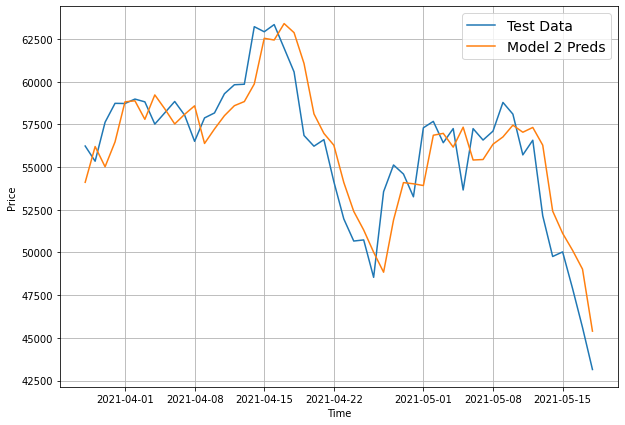

In [ ]:
offset = 500
plt.figure(figsize=(10, 7))

timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=test_labels[:, 0], format="-", start=offset, end=None, label="Test Data")
timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=model_2_preds, format="-", start=offset, end=None, label="Model 2 Preds")

> Check for autoCorrelation to understand why we observe offset

## Model - 3: Same as model#1 but with horizon of 7 and windows of 30

In [ ]:
HORIZON = 7
WINDOW = 30
full_windows, full_labels = make_windows(array, WINDOW, HORIZON)

for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
 133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
 177.63333 188.29716 200.70166 180.355   175.03166 177.6965  187.15983
 192.75666 197.4    ] -> Label: [196.02499 198.04883 198.93233 200.543   210.3075  225.02    248.25333]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033
 124.049   125.96116 125.27966 125.9275  126.38333 135.24199 133.20333
 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333
 188.29716 200.70166 180.355   175.03166 177.6965  187.15983 192.75666
 197.4     196.02499] -> Label: [198.04883 198.93233 200.543   210.3075  225.02    248.25333 262.32666]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049
 125.96116 125.27966 125.9275  126.38333 135.24199 133.20333 142.76333
 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333 188

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="Model_3")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

history_3 = model_3.fit(train_windows,
                        train_labels,
                        epochs=100, 
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 2257.7266 - mae: 2257.7266 - mse: 20281074.0000  

18/18 [==============================] - 5s 62ms/step - loss: 2147.1594 - mae: 2147.1594 - mse: 18988486.0000 - val_loss: 3403.3113 - val_mae: 3403.3113 - val_mse: 28520972.0000
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 587.2018 - mae: 587.2018 - mse: 1486948.5000

18/18 [==============================] - 1s 48ms/step - loss: 587.2018 - mae: 587.2018 - mse: 1486948.5000 - val_loss: 2999.0994 - val_mae: 2999.0994 - val_mse: 25693510.0000
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 446.8051 - mae: 446.8051 - mse: 918532.1875

18/18 [==============================] - 2s 88ms/step - loss: 446.0717 - mae: 446.0717 - mse: 961517.1875 - val_loss: 2396.4138 - val_mae: 2396.4138 - val_mse: 17182140.0000
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 419.7444 - mae: 419.7444 - mse: 869095.0000

18/18 [==============================] - 2s 109ms/step - loss: 416.2412 - mae: 416.2412 - mse: 859220.8750 - val_loss: 2036.9138 - val_mae: 2036.9138 - val_mse: 12807934.0000
Epoch 5/100
18/18 [==============================] - 0s 14ms/step - loss: 385.1272 - mae: 385.1272 - mse: 742853.8750 - val_loss: 2094.5134 - val_mae: 2094.5134 - val_mse: 13277965.0000
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 370.0750 - mae: 370.0750 - mse: 685979.3750

18/18 [==============================] - 1s 56ms/step - loss: 362.2368 - mae: 362.2368 - mse: 649656.5000 - val_loss: 1818.0132 - val_mae: 1818.0132 - val_mse: 10428606.0000
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 345.7890 - mae: 345.7890 - mse: 611863.1250

18/18 [==============================] - 1s 42ms/step - loss: 340.1001 - mae: 340.1001 - mse: 578213.5000 - val_loss: 1666.0833 - val_mae: 1666.0833 - val_mse: 8812629.0000
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 330.0399 - mae: 330.0399 - mse: 523549.2188

18/18 [==============================] - 1s 40ms/step - loss: 331.0212 - mae: 331.0212 - mse: 530150.2500 - val_loss: 1646.7540 - val_mae: 1646.7540 - val_mse: 8621413.0000
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 316.7874 - mae: 316.7874 - mse: 490954.2500 - val_loss: 1779.3474 - val_mae: 1779.3474 - val_mse: 9400121.0000
Epoch 10/100
12/18 [===================>..........] - ETA: 0s - loss: 322.7955 - mae: 322.7955 - mse: 475032.3438

18/18 [==============================] - 1s 62ms/step - loss: 315.4266 - mae: 315.4266 - mse: 469426.1875 - val_loss: 1600.9591 - val_mae: 1600.9591 - val_mse: 7931398.5000
Epoch 11/100
12/18 [===================>..........] - ETA: 0s - loss: 303.8056 - mae: 303.8056 - mse: 437748.5000

18/18 [==============================] - 1s 58ms/step - loss: 303.3776 - mae: 303.3776 - mse: 443560.3438 - val_loss: 1509.7938 - val_mae: 1509.7938 - val_mse: 7331447.0000
Epoch 12/100
18/18 [==============================] - 0s 8ms/step - loss: 288.1227 - mae: 288.1227 - mse: 413878.9375 - val_loss: 1608.2555 - val_mae: 1608.2555 - val_mse: 7994152.5000
Epoch 13/100
12/18 [===================>..........] - ETA: 0s - loss: 272.5673 - mae: 272.5673 - mse: 380325.7812

18/18 [==============================] - 1s 59ms/step - loss: 282.9827 - mae: 282.9827 - mse: 397604.8438 - val_loss: 1448.8518 - val_mae: 1448.8518 - val_mse: 6856453.0000
Epoch 14/100
18/18 [==============================] - 0s 8ms/step - loss: 277.8590 - mae: 277.8590 - mse: 385781.4375 - val_loss: 1452.5861 - val_mae: 1452.5861 - val_mse: 6881556.0000
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 275.3942 - mae: 275.3942 - mse: 382224.0625 - val_loss: 1507.6963 - val_mae: 1507.6963 - val_mse: 7119226.0000
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 268.2217 - mae: 268.2217 - mse: 364325.2500 - val_loss: 1467.2041 - val_mae: 1467.2041 - val_mse: 6814251.5000
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 266.9132 - mae: 266.9132 - mse: 362616.7188 - val_loss: 1544.8301 - val_mae: 1544.8301 - val_mse: 7327422.0000
Epoch 18/100
14/18 [======================>.......] - ETA: 0s - loss: 271.0193 - mae: 2

18/18 [==============================] - 1s 52ms/step - loss: 262.6207 - mae: 262.6207 - mse: 353018.3750 - val_loss: 1423.0885 - val_mae: 1423.0885 - val_mse: 6532147.0000
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 256.3075 - mae: 256.3075 - mse: 341434.1562 - val_loss: 1509.1965 - val_mae: 1509.1965 - val_mse: 7103294.5000
Epoch 20/100
18/18 [==============================] - 0s 7ms/step - loss: 260.7084 - mae: 260.7084 - mse: 347592.6562 - val_loss: 1461.8590 - val_mae: 1461.8590 - val_mse: 6946413.5000
Epoch 21/100
18/18 [==============================] - 0s 6ms/step - loss: 259.2103 - mae: 259.2103 - mse: 342335.0312 - val_loss: 1452.1384 - val_mae: 1452.1384 - val_mse: 6654680.5000
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 251.3171 - mae: 251.3171 - mse: 329047.5312

18/18 [==============================] - 1s 43ms/step - loss: 251.3171 - mae: 251.3171 - mse: 329047.5312 - val_loss: 1388.1321 - val_mae: 1388.1321 - val_mse: 6224831.0000
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 253.7114 - mae: 253.7114 - mse: 329917.0312 - val_loss: 1392.9276 - val_mae: 1392.9276 - val_mse: 6380239.0000
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 270.3505 - mae: 270.3505 - mse: 360073.8125

18/18 [==============================] - 1s 38ms/step - loss: 269.0972 - mae: 269.0972 - mse: 357163.8750 - val_loss: 1321.2476 - val_mae: 1321.2476 - val_mse: 5924798.0000
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 249.4361 - mae: 249.4361 - mse: 321984.7812 - val_loss: 1615.4176 - val_mae: 1615.4176 - val_mse: 7674937.0000
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 254.3705 - mae: 254.3705 - mse: 328284.8750 - val_loss: 1372.8022 - val_mae: 1372.8022 - val_mse: 6129539.5000
Epoch 27/100
18/18 [==============================] - 0s 6ms/step - loss: 243.9430 - mae: 243.9430 - mse: 316113.0938 - val_loss: 1373.3745 - val_mae: 1373.3745 - val_mse: 6111332.0000
Epoch 28/100
18/18 [==============================] - 0s 11ms/step - loss: 242.6266 - mae: 242.6266 - mse: 308878.6562 - val_loss: 1348.8807 - val_mae: 1348.8807 - val_mse: 5981088.5000
Epoch 29/100
18/18 [==============================] - 0s 9ms/step - loss: 242.5812 - m

18/18 [==============================] - 2s 142ms/step - loss: 239.6138 - mae: 239.6138 - mse: 304952.7812 - val_loss: 1312.0825 - val_mae: 1312.0825 - val_mse: 5850345.0000
Epoch 33/100
18/18 [==============================] - 0s 20ms/step - loss: 239.8656 - mae: 239.8656 - mse: 304358.9375 - val_loss: 1317.8228 - val_mae: 1317.8228 - val_mse: 5863929.5000
Epoch 34/100
18/18 [==============================] - 0s 8ms/step - loss: 241.0759 - mae: 241.0759 - mse: 307735.1875 - val_loss: 1418.5446 - val_mae: 1418.5446 - val_mse: 6375161.0000
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 245.9532 - mae: 245.9532 - mse: 311306.6875 - val_loss: 1381.6682 - val_mae: 1381.6682 - val_mse: 6263025.0000
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 239.8388 - mae: 239.8388 - mse: 306509.9062 - val_loss: 1346.2893 - val_mae: 1346.2893 - val_mse: 6087145.0000
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 251.0722 - 

18/18 [==============================] - 1s 39ms/step - loss: 243.6469 - mae: 243.6469 - mse: 310157.6562 - val_loss: 1299.8981 - val_mae: 1299.8981 - val_mse: 5778329.0000
Epoch 43/100
17/18 [===========================>..] - ETA: 0s - loss: 233.1037 - mae: 233.1037 - mse: 292509.4688

18/18 [==============================] - 1s 40ms/step - loss: 232.9256 - mae: 232.9256 - mse: 291963.0000 - val_loss: 1274.9408 - val_mae: 1274.9408 - val_mse: 5653912.0000
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 237.5285 - mae: 237.5285 - mse: 298008.2188 - val_loss: 1283.5890 - val_mae: 1283.5890 - val_mse: 5654211.0000
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 232.9209 - mae: 232.9209 - mse: 291564.6250 - val_loss: 1459.0629 - val_mae: 1459.0629 - val_mse: 6431509.0000
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 241.3435 - mae: 241.3435 - mse: 301308.5938 - val_loss: 1300.3820 - val_mae: 1300.3820 - val_mse: 5755233.0000
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 237.0586 - mae: 237.0586 - mse: 298490.1250 - val_loss: 1341.6890 - val_mae: 1341.6890 - val_mse: 5913608.5000
Epoch 48/100
18/18 [==============================] - 0s 9ms/step - loss: 232.9107 - ma

18/18 [==============================] - 1s 38ms/step - loss: 233.4798 - mae: 233.4798 - mse: 287204.7812 - val_loss: 1271.2437 - val_mae: 1271.2437 - val_mse: 5613491.5000
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 235.1173 - mae: 235.1173 - mse: 293690.5000 - val_loss: 1275.1899 - val_mae: 1275.1899 - val_mse: 5634186.5000
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 233.0077 - mae: 233.0077 - mse: 288455.2812 - val_loss: 1284.8928 - val_mae: 1284.8928 - val_mse: 5577735.0000
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 230.7950 - mae: 230.7950 - mse: 281231.0938 - val_loss: 1291.7345 - val_mae: 1291.7345 - val_mse: 5631917.0000
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 231.0136 - mae: 231.0136 - mse: 287407.0312 - val_loss: 1332.5957 - val_mae: 1332.5957 - val_mse: 5772222.5000
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 235.5619 - ma

18/18 [==============================] - 1s 39ms/step - loss: 234.7524 - mae: 234.7524 - mse: 285197.8750 - val_loss: 1271.0679 - val_mae: 1271.0679 - val_mse: 5475630.0000
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 228.5923 - mae: 228.5923 - mse: 271770.3438 - val_loss: 1547.8135 - val_mae: 1547.8135 - val_mse: 7165738.5000
Epoch 70/100
14/18 [======================>.......] - ETA: 0s - loss: 237.4293 - mae: 237.4293 - mse: 289785.0625

18/18 [==============================] - 1s 38ms/step - loss: 234.9296 - mae: 234.9296 - mse: 288645.5625 - val_loss: 1249.4097 - val_mae: 1249.4097 - val_mse: 5362963.0000
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 227.7940 - mae: 227.7940 - mse: 280207.2812 - val_loss: 1252.1697 - val_mae: 1252.1697 - val_mse: 5435568.5000
Epoch 72/100
12/18 [===================>..........] - ETA: 0s - loss: 243.2029 - mae: 243.2029 - mse: 317580.7188

18/18 [==============================] - 1s 41ms/step - loss: 229.3857 - mae: 229.3857 - mse: 278681.8125 - val_loss: 1242.6992 - val_mae: 1242.6992 - val_mse: 5385432.5000
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 227.1391 - mae: 227.1391 - mse: 276738.9375 - val_loss: 1293.4521 - val_mae: 1293.4521 - val_mse: 5540879.0000
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 229.9861 - mae: 229.9861 - mse: 282820.9062 - val_loss: 1267.5139 - val_mae: 1267.5139 - val_mse: 5465818.5000
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 228.1181 - mae: 228.1181 - mse: 277253.1562 - val_loss: 1426.2517 - val_mae: 1426.2517 - val_mse: 6306992.5000
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 231.4512 - mae: 231.4512 - mse: 284901.5312 - val_loss: 1329.0310 - val_mae: 1329.0310 - val_mse: 5722679.0000
Epoch 77/100
17/18 [===========================>..] - ETA: 0s - loss: 225.2525 - mae: 2

18/18 [==============================] - 1s 40ms/step - loss: 225.2218 - mae: 225.2218 - mse: 274055.0938 - val_loss: 1235.7661 - val_mae: 1235.7661 - val_mse: 5402479.0000
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 231.3770 - mae: 231.3770 - mse: 277502.4688 - val_loss: 1264.9222 - val_mae: 1264.9222 - val_mse: 5477319.5000
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 234.9645 - mae: 234.9645 - mse: 279987.5312 - val_loss: 1333.1531 - val_mae: 1333.1531 - val_mse: 5721396.5000
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 231.4066 - mae: 231.4066 - mse: 278248.9375 - val_loss: 1311.0697 - val_mae: 1311.0697 - val_mse: 5667707.5000
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 228.7589 - mae: 228.7589 - mse: 278146.1875 - val_loss: 1251.1979 - val_mae: 1251.1979 - val_mse: 5421430.5000
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 226.5327 - ma

18/18 [==============================] - 1s 58ms/step - loss: 229.3537 - mae: 229.3537 - mse: 279155.6875 - val_loss: 1226.3240 - val_mae: 1226.3240 - val_mse: 5297539.5000
Epoch 99/100
18/18 [==============================] - 0s 9ms/step - loss: 223.6295 - mae: 223.6295 - mse: 270547.3750 - val_loss: 1245.7516 - val_mae: 1245.7516 - val_mse: 5359020.5000
Epoch 100/100
18/18 [==============================] - 0s 9ms/step - loss: 223.5692 - mae: 223.5692 - mse: 269866.3125 - val_loss: 1383.5917 - val_mae: 1383.5917 - val_mse: 6064514.5000


In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 1383.5917 - mae: 1383.5917 - mse: 6064515.0000


[1383.5916748046875, 1383.5916748046875, 6064515.0]

In [ ]:
Model_3 = tf.keras.models.load_model("model_experiments/Model_3")
Model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1226.3241 - mae: 1226.3241 - mse: 5297539.5000


[1226.3240966796875, 1226.3240966796875, 5297539.5]

In [ ]:
model_3_preds = make_preds(Model_3, test_windows)
model_3_preds

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(551, 7), dtype=float32, numpy=
array([[ 9396.684,  9464.56 ,  9654.809, ...,  9531.647,  9589.151,
         9555.769],
       [ 8933.7  ,  9032.95 ,  9281.169, ...,  9243.319,  9295.886,
         9416.654],
       [ 8817.604,  8875.347,  9010.425, ...,  9054.081,  9114.019,
         9119.962],
       ...,
       [57618.652, 58641.094, 59654.91 , ..., 57500.906, 58370.906,
        59217.805],
       [59881.61 , 58815.61 , 59364.26 , ..., 58587.02 , 60386.72 ,
        59879.863],
       [57488.46 , 57010.164, 57768.844, ..., 58150.03 , 57900.164,
        59385.01 ]], dtype=float32)>

In [ ]:
model_3_results = time_series_evaluation_metrics(y_true=tf.squeeze(tf.cast(test_labels, tf.float32)), y_pred=model_3_preds)
model_3_results

{'MAE': 1226.324,
 'MSE': 5297540.0,
 'RMSE': 2301.6384,
 'MAPE': 5.543503,
 'MASE': 2.1821752}

> Actual plot

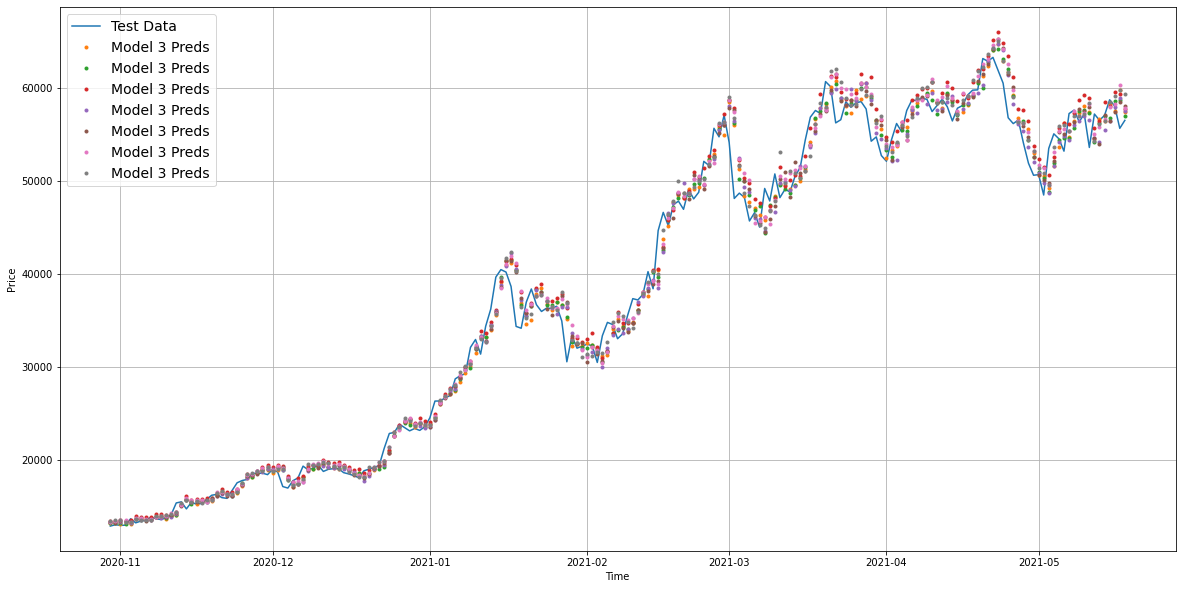

In [ ]:
offset = 350
plt.figure(figsize=(20, 10))

timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=test_labels[:, 0], format="-", start=offset, end=None, label="Test Data")
timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=model_3_preds, start=offset, end=None, label="Model 3 Preds")

> For understanding purposes we have reduce the dimensionality of predicted values

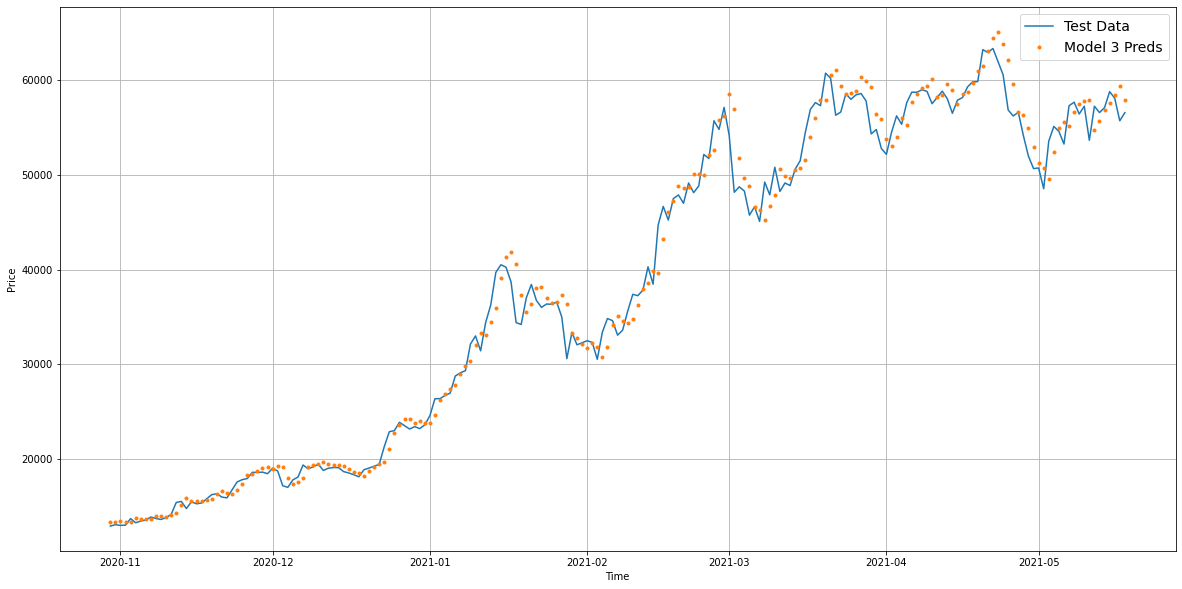

In [ ]:
offset = 350
plt.figure(figsize=(20, 10))

timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=test_labels[:, 0], format="-", start=offset, end=None, label="Test Data")
timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=tf.reduce_mean(model_3_preds, axis=1), start=offset, end=None, label="Model 3 Preds")

### Comparing the all three models results

In [ ]:
model_results = {'Naive':naive_result, 'Model1':model_1_results, 'Model2':model_2_results, 'Model3':model_3_results}

In [ ]:
def make_pred_comparison(model_result, metric):
  X = []
  Y = []
  for i in model_results.items():
    x = X.append(i[0])
    y = Y.append(i[1][metric])

  plt.figure(figsize=(12, 6))
  sns.barplot(x=X, y=Y)
  plt.title(f"{metric} comparison of different models")
  plt.xlabel('Models Name')
  plt.ylabel(metric)
  plt.show()   

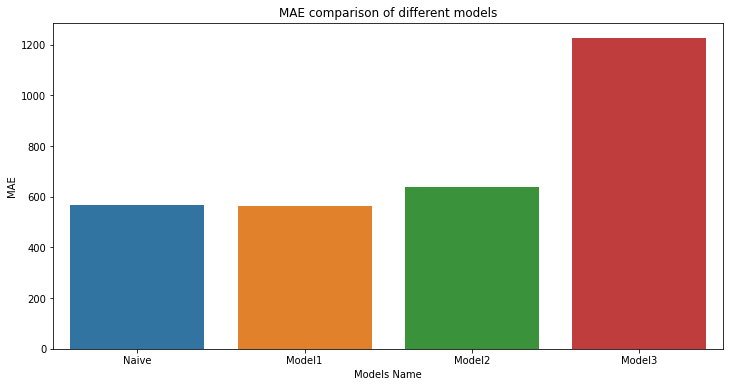

In [ ]:
make_pred_comparison(model_results, 'MAE')

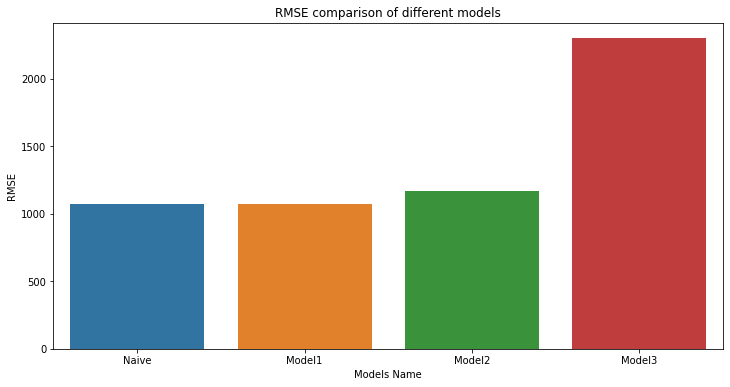

In [ ]:
make_pred_comparison(model_results, 'RMSE')

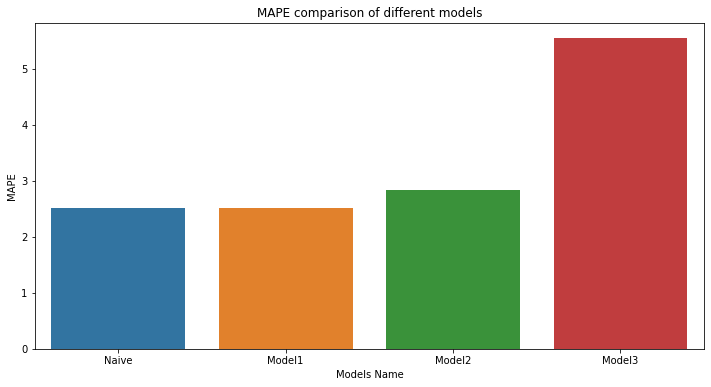

In [ ]:
make_pred_comparison(model_results, 'MAPE')

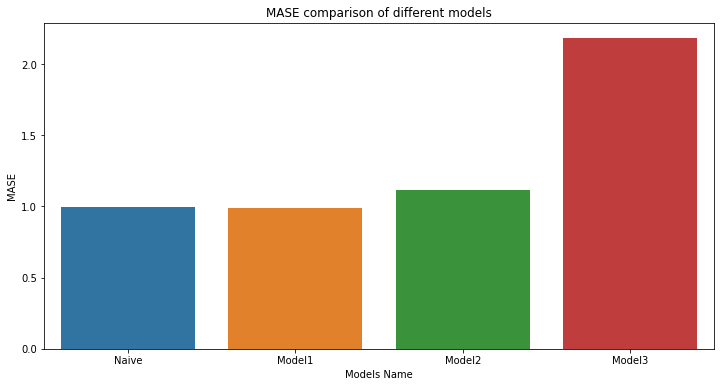

In [ ]:
make_pred_comparison(model_results, 'MASE')

## Model 4: Conv1D

> Preparing dataset for conv1D model

Based on our previous result horizon = 1, and windows = 7 work best of all continuing with these parameters

For making the input layer of conv1D we need input shape in this format batch_size + (steps, input_ndim)

In [ ]:
BATCH_SIZE = 128
HORIZON = 1 #steps
WINDOW = 7 #input_ndim

In [ ]:
array = np.array(price)
full_windows, full_labels = make_windows(array, WINDOW, HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows),  len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [ ]:
windows = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
expand_dims_layer(windows).shape

TensorShape([7, 1])

In [ ]:
len(train_windows), len(train_labels)

(2224, 2224)

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name="Model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

history_4 = model_4.fit(train_windows,
                        train_labels,
                        batch_size=128,
                        epochs=100,
                        verbose=1,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 2184.6406  

18/18 [==============================] - 11s 58ms/step - loss: 2116.0938 - val_loss: 6397.0879
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 420.3214

18/18 [==============================] - 1s 50ms/step - loss: 420.3214 - val_loss: 1916.8354
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 222.3734

18/18 [==============================] - 1s 38ms/step - loss: 222.3734 - val_loss: 1116.9613
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 186.0273

18/18 [==============================] - 1s 40ms/step - loss: 186.0273 - val_loss: 1047.8771
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 180.9966

18/18 [==============================] - 1s 38ms/step - loss: 179.1717 - val_loss: 1027.6694
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 178.8438

18/18 [==============================] - 1s 40ms/step - loss: 178.8438 - val_loss: 995.9984
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 180.3427

18/18 [==============================] - 1s 39ms/step - loss: 180.3427 - val_loss: 984.9431
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 175.1935

18/18 [==============================] - 1s 40ms/step - loss: 175.1935 - val_loss: 978.7838
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 173.7734 - val_loss: 983.6302
Epoch 10/100
15/18 [========================>.....] - ETA: 0s - loss: 167.7681

18/18 [==============================] - 1s 39ms/step - loss: 171.6876 - val_loss: 964.1657
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 192.3346

18/18 [==============================] - 1s 41ms/step - loss: 170.1624 - val_loss: 944.6342
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 170.4861 - val_loss: 946.3825
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 166.6103 - val_loss: 958.1665
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 164.4020 - val_loss: 955.6898
Epoch 15/100
17/18 [===========================>..] - ETA: 0s - loss: 164.7760

18/18 [==============================] - 1s 41ms/step - loss: 164.6626 - val_loss: 904.9974
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 160.5753

18/18 [==============================] - 1s 40ms/step - loss: 160.5753 - val_loss: 901.8086
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 158.2834 - val_loss: 953.9003
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 158.6476

18/18 [==============================] - 1s 69ms/step - loss: 157.3714 - val_loss: 892.0517
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 153.7835 - val_loss: 906.2839
Epoch 20/100
13/18 [====================>.........] - ETA: 0s - loss: 158.7983

18/18 [==============================] - 1s 58ms/step - loss: 154.2951 - val_loss: 844.3915
Epoch 21/100
18/18 [==============================] - 0s 10ms/step - loss: 150.5380 - val_loss: 853.7324
Epoch 22/100
12/18 [===================>..........] - ETA: 0s - loss: 159.8689

18/18 [==============================] - 1s 56ms/step - loss: 148.3632 - val_loss: 841.4542
Epoch 23/100
18/18 [==============================] - 0s 9ms/step - loss: 146.0398 - val_loss: 851.9428
Epoch 24/100
13/18 [====================>.........] - ETA: 0s - loss: 143.1004

18/18 [==============================] - 1s 42ms/step - loss: 145.1132 - val_loss: 823.2849
Epoch 25/100
16/18 [=========================>....] - ETA: 0s - loss: 145.6730

18/18 [==============================] - 1s 41ms/step - loss: 142.2515 - val_loss: 789.3748
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 140.8960

18/18 [==============================] - 1s 40ms/step - loss: 141.1175 - val_loss: 772.6898
Epoch 27/100
18/18 [==============================] - 0s 6ms/step - loss: 139.3703 - val_loss: 781.6214
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 135.4008

18/18 [==============================] - 1s 38ms/step - loss: 137.1704 - val_loss: 757.2472
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 138.1578

18/18 [==============================] - 1s 40ms/step - loss: 138.1578 - val_loss: 743.5640
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 138.1910 - val_loss: 886.0256
Epoch 31/100
18/18 [==============================] - ETA: 0s - loss: 139.9654

18/18 [==============================] - 1s 41ms/step - loss: 139.9654 - val_loss: 728.0739
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 132.6205

18/18 [==============================] - 1s 40ms/step - loss: 131.9987 - val_loss: 721.4705
Epoch 33/100
18/18 [==============================] - ETA: 0s - loss: 131.0077

18/18 [==============================] - 1s 55ms/step - loss: 131.0077 - val_loss: 715.8314
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 129.1969 - val_loss: 730.0226
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 128.2931

18/18 [==============================] - 1s 40ms/step - loss: 128.1021 - val_loss: 702.1565
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 129.4957 - val_loss: 705.0461
Epoch 37/100
15/18 [========================>.....] - ETA: 0s - loss: 127.9967

18/18 [==============================] - 1s 41ms/step - loss: 125.7075 - val_loss: 687.0197
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 123.9847

18/18 [==============================] - 1s 41ms/step - loss: 123.9847 - val_loss: 676.6544
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 123.4544 - val_loss: 694.4086
Epoch 40/100
17/18 [===========================>..] - ETA: 0s - loss: 123.1229

18/18 [==============================] - 1s 41ms/step - loss: 122.6417 - val_loss: 666.9560
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 122.7948

18/18 [==============================] - 1s 39ms/step - loss: 122.7948 - val_loss: 663.6323
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 123.0466 - val_loss: 663.6734
Epoch 43/100
17/18 [===========================>..] - ETA: 0s - loss: 120.3321

18/18 [==============================] - 1s 52ms/step - loss: 120.5592 - val_loss: 651.9888
Epoch 44/100
18/18 [==============================] - 0s 8ms/step - loss: 121.0111 - val_loss: 653.1964
Epoch 45/100
13/18 [====================>.........] - ETA: 0s - loss: 117.7366

18/18 [==============================] - 1s 54ms/step - loss: 119.2524 - val_loss: 642.8428
Epoch 46/100
14/18 [======================>.......] - ETA: 0s - loss: 123.0927

18/18 [==============================] - 1s 57ms/step - loss: 119.9783 - val_loss: 639.2003
Epoch 47/100
18/18 [==============================] - 0s 8ms/step - loss: 121.1523 - val_loss: 642.8524
Epoch 48/100
18/18 [==============================] - 0s 8ms/step - loss: 119.1544 - val_loss: 654.1346
Epoch 49/100
18/18 [==============================] - 0s 8ms/step - loss: 117.7191 - val_loss: 641.9604
Epoch 50/100
13/18 [====================>.........] - ETA: 0s - loss: 113.9037

18/18 [==============================] - 1s 42ms/step - loss: 118.3383 - val_loss: 637.2838
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 116.8820 - val_loss: 662.3299
Epoch 52/100
17/18 [===========================>..] - ETA: 0s - loss: 117.7244

18/18 [==============================] - 1s 40ms/step - loss: 117.3212 - val_loss: 622.0691
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 117.7396 - val_loss: 627.1772
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 115.3033 - val_loss: 645.6486
Epoch 55/100
17/18 [===========================>..] - ETA: 0s - loss: 119.4807

18/18 [==============================] - 1s 55ms/step - loss: 117.8940 - val_loss: 619.3610
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 122.2574 - val_loss: 690.6792
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 131.4355 - val_loss: 623.5565
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 117.2914 - val_loss: 620.7204
Epoch 59/100
17/18 [===========================>..] - ETA: 0s - loss: 112.2815

18/18 [==============================] - 1s 40ms/step - loss: 113.5978 - val_loss: 611.9899
Epoch 60/100
 1/18 [>.............................] - ETA: 0s - loss: 92.7683

18/18 [==============================] - 1s 39ms/step - loss: 113.9180 - val_loss: 611.4985
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 113.2664 - val_loss: 617.1429
Epoch 62/100
18/18 [==============================] - ETA: 0s - loss: 114.0063

18/18 [==============================] - 1s 42ms/step - loss: 114.0063 - val_loss: 607.4548
Epoch 63/100
14/18 [======================>.......] - ETA: 0s - loss: 118.1744

18/18 [==============================] - 1s 40ms/step - loss: 115.3400 - val_loss: 605.3774
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9700 - val_loss: 664.5231
Epoch 65/100
18/18 [==============================] - 0s 7ms/step - loss: 118.7774 - val_loss: 668.0007
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2064 - val_loss: 619.5437
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 114.2309 - val_loss: 610.5323
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 116.3669 - val_loss: 635.3360
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 121.7026 - val_loss: 655.3969
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 118.8057 - val_loss: 617.1396
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 95.3087

18/18 [==============================] - 1s 39ms/step - loss: 112.3581 - val_loss: 604.3854
Epoch 72/100
17/18 [===========================>..] - ETA: 0s - loss: 111.0254

18/18 [==============================] - 1s 39ms/step - loss: 112.6832 - val_loss: 594.7665
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1708 - val_loss: 608.6194
Epoch 74/100
18/18 [==============================] - ETA: 0s - loss: 112.0870

18/18 [==============================] - 1s 41ms/step - loss: 112.0870 - val_loss: 592.2077
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4555 - val_loss: 601.1133
Epoch 76/100
18/18 [==============================] - ETA: 0s - loss: 111.7644

18/18 [==============================] - 1s 38ms/step - loss: 111.7644 - val_loss: 590.6765
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3882 - val_loss: 626.6082
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8700 - val_loss: 600.2656
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1676 - val_loss: 598.1473
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 118.7380 - val_loss: 724.2927
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3421 - val_loss: 616.0292
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 113.9137 - val_loss: 599.4494
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 111.7104 - val_loss: 636.3972
Epoch 84/100
12/18 [===================>..........] - ETA: 0s - loss: 108.8333

18/18 [==============================] - 1s 57ms/step - loss: 112.9780 - val_loss: 590.6151
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 110.3839 - val_loss: 612.2831
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 110.8225 - val_loss: 641.2202
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 114.3177 - val_loss: 603.1360
Epoch 88/100
12/18 [===================>..........] - ETA: 0s - loss: 114.0978

18/18 [==============================] - 1s 55ms/step - loss: 111.1019 - val_loss: 584.0514
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 109.9191 - val_loss: 586.0114
Epoch 90/100
18/18 [==============================] - 0s 8ms/step - loss: 112.1895 - val_loss: 750.1986
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 117.0434 - val_loss: 585.5844
Epoch 92/100
18/18 [==============================] - 0s 7ms/step - loss: 112.3038 - val_loss: 592.8289
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 111.3138 - val_loss: 632.0351
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 112.2910 - val_loss: 647.1373
Epoch 95/100
18/18 [==============================] - 0s 7ms/step - loss: 110.3481 - val_loss: 584.3259
Epoch 96/100
12/18 [===================>..........] - ETA: 0s - loss: 109.1049

18/18 [==============================] - 1s 58ms/step - loss: 110.9521 - val_loss: 579.2188
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7714 - val_loss: 634.9902
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3377 - val_loss: 587.9301
Epoch 99/100
18/18 [==============================] - ETA: 0s - loss: 109.0392

18/18 [==============================] - 1s 40ms/step - loss: 109.0392 - val_loss: 576.5988
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3562 - val_loss: 578.6385


In [ ]:
model_4.summary()
# Our output shape is 3 dimension need to change to (None, 1)

Model: "Model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_13 (Lambda)          (None, 1, 7)              0         
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_2 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 578.6384


578.6383666992188

In [ ]:
Model_4 = tf.keras.models.load_model("model_experiments/Model_4_conv1D")

In [ ]:
Model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 5ms/step - loss: 576.5988


576.5987548828125

In [ ]:
model_4_preds = make_preds(Model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8919.824, 8792.971, 8984.527, 8796.466, 8746.508, 8748.515,
       8689.792, 8545.381, 8469.27 , 8518.054], dtype=float32)>

In [ ]:
model_4_results = time_series_evaluation_metrics(y_true=tf.squeeze(tf.cast(test_labels, tf.float32)), y_pred=model_4_preds)
model_4_results

{'MAE': 576.5988,
 'MSE': 1206544.2,
 'RMSE': 1098.4281,
 'MAPE': 2.5914414,
 'MASE': 1.0129244}

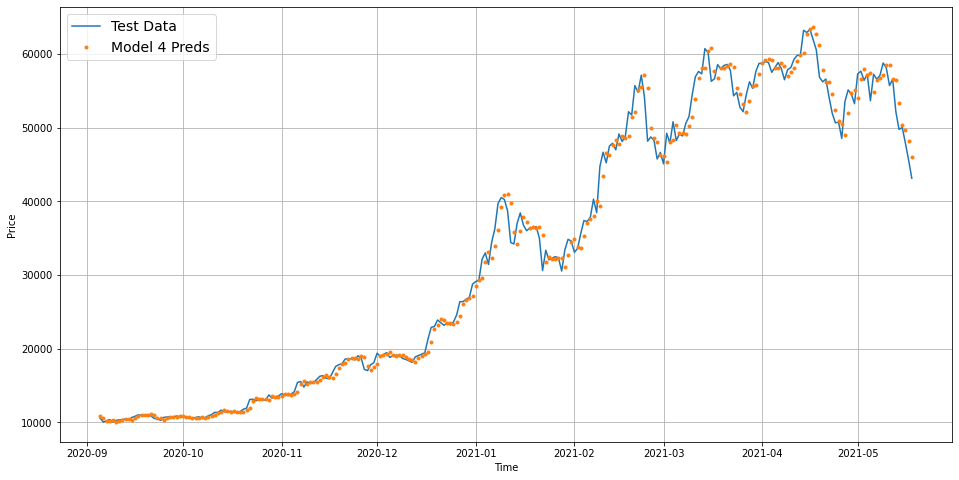

In [ ]:
offset = 300
plt.figure(figsize=(16, 8))

timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=test_labels[:, 0], format="-", start=offset, end=None, label="Test Data")
timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=model_4_preds, start=offset, end=None, label="Model 4 Preds")

## Model_5: LSTM

> We need to make a 3D input shape like [batch, timesteps, feature].

In [21]:
BATCH_SIZE = 128
HORIZON = 1 #steps
WINDOW = 7 #input_ndim

In [22]:
array = np.array(price)
full_windows, full_labels = make_windows(array, WINDOW, HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [23]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows),  len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [28]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW))
x = layers.Lambda(lambda x : tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

history_5 = model_5.fit(train_windows,
                        train_labels,
                        batch_size=128,
                        epochs=100,
                        verbose=1,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 126ms/step - loss: 2867.2698 - val_loss: 15832.9854
Epoch 2/100
18/18 [==============================] - 2s 100ms/step - loss: 2086.3105 - val_loss: 9275.0928
Epoch 3/100
18/18 [==============================] - 2s 140ms/step - loss: 873.1808 - val_loss: 1302.9720
Epoch 4/100
18/18 [==============================] - 2s 100ms/step - loss: 254.3599 - val_loss: 1040.7661
Epoch 5/100
18/18 [==============================] - 2s 100ms/step - loss: 197.8573 - val_loss: 1035.5829
Epoch 6/100
18/18 [==============================] - 0s 9ms/step - loss: 191.2464 - val_loss: 1074.1029
Epoch 7/100
18/18 [==============================] - 2s 129ms/step - loss: 183.8893 - val_loss: 1013.9303
Epoch 8/100
18/18 [==============================] - 2s 136ms/step - loss: 168.2909 - val_loss: 893.1954
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 161.1463 - val_loss: 980.2958
Epoch 10/100
18/18 [=============================

In [30]:
Model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")

In [31]:
Model_5.summary()

Model: "model_5_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_4 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               69632     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [32]:
Model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 598.0543


598.0543212890625

In [33]:
model_5_preds  = make_preds(Model_5, test_windows)

18/18 [==============================] - 1s 5ms/step


In [34]:
model_5_results = time_series_evaluation_metrics(y_true=tf.squeeze(tf.cast(test_labels, tf.float32)), y_pred=model_5_preds)
model_5_results

{'MAE': 598.0543,
 'MSE': 1273145.8,
 'RMSE': 1128.3376,
 'MAPE': 2.6883698,
 'MASE': 1.0506158}

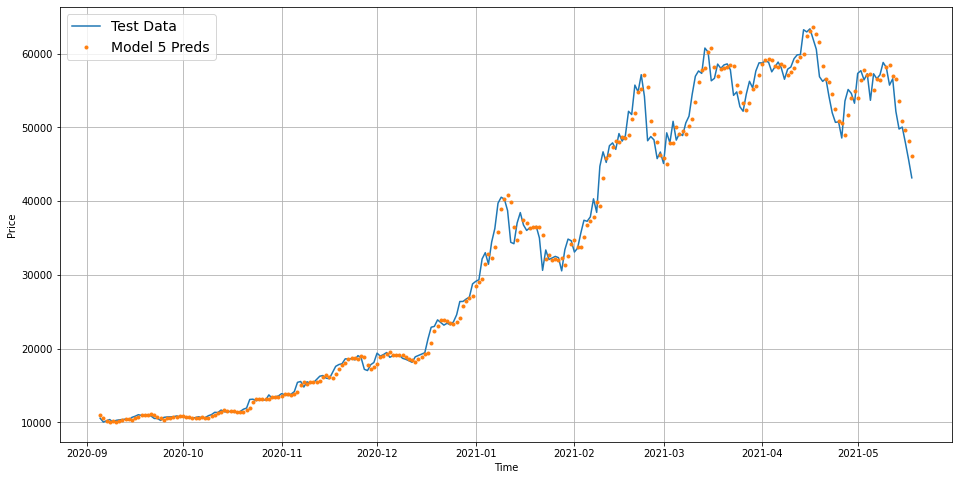

In [35]:
offset = 300
plt.figure(figsize=(16, 8))

timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=test_labels[:, 0], format="-", start=offset, end=None, label="Test Data")
timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=model_5_preds, start=offset, end=None, label="Model 5 Preds")